# Bussiness Problem

Business Problem: Investment Risk and Return in Ajwain Commodity Market

Ajwain, a high-demand spice in India, shows significant price fluctuations across states and markets. These fluctuations are driven by seasonality, crop arrivals, demand patterns, and storage limitations.

For commodity investors and agri-business firms, the absence of reliable price prediction models and market volatility analysis creates uncertainty in making profitable investment decisions. Investors face challenges such as:

Identifying high-return markets with stable price growth.

Understanding seasonal demand–supply gaps to time investments.

Evaluating risk factors like overproduction, poor arrivals, or sudden price spikes.

Forecasting future price trends to build investment strategies.

# Loading The Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Ajwan.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27964 entries, 0 to 27963
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   State Name                 27964 non-null  object 
 1   District Name              27964 non-null  object 
 2   Market Name                27964 non-null  object 
 3   Variety                    27964 non-null  object 
 4   Group                      27964 non-null  object 
 5   Arrivals (Tonnes)          27964 non-null  float64
 6   Min Price (Rs./Quintal)    27964 non-null  float64
 7   Max Price (Rs./Quintal)    27964 non-null  float64
 8   Modal Price (Rs./Quintal)  27956 non-null  float64
 9   Reported Date              27964 non-null  object 
dtypes: float64(4), object(6)
memory usage: 2.1+ MB


# Data Exploration

In [4]:
df['State Name'].unique()

array(['Andhra Pradesh', 'Telangana', 'Madhya Pradesh', 'Haryana',
       'Gujarat', 'Punjab', 'Maharashtra', 'Odisha', 'Rajasthan',
       'Chattisgarh', 'Uttar Pradesh'], dtype=object)

In [5]:
df.columns

Index(['State Name', 'District Name', 'Market Name', 'Variety', 'Group',
       'Arrivals (Tonnes)', 'Min Price (Rs./Quintal)',
       'Max Price (Rs./Quintal)', 'Modal Price (Rs./Quintal)',
       'Reported Date'],
      dtype='object')

In [6]:
df['District Name'].unique()

array(['Kurnool', 'Vijayanagaram', 'Krishna', 'Cuddapah', 'Nalgonda',
       'Hyderabad', 'Adilabad', 'Medak', 'Ranga Reddy', 'Shivpuri',
       'Guna', 'Bhopal', 'Ashoknagar', 'Anupur', 'Vidisha', 'Mandsaur',
       'Neemuch', 'Ujjain', 'Indore', 'Ratlam', 'Bhiwani', 'Mehsana',
       'Jamnagar', 'Ahmedabad', 'Amreli', 'Bhavnagar', 'Patan', 'Surat',
       'Kheda', 'Banaskanth', 'Surendranagar', 'Mansa', 'Amarawati',
       'Akola', 'Aurangabad', 'Buldhana', 'Jalgaon', 'Nandurbar', 'Dhule',
       'Jajpur', 'Rayagada', 'Tonk', 'Jhalawar', 'Nagaur', 'Bhilwara',
       'Jodhpur', 'Dausa', 'Kota', 'Chittorgarh', 'Ajmer', 'Jaipur',
       'Jashpur', 'Koria', 'Pratapgarh'], dtype=object)

In [7]:
df['Market Name'].unique()

array(['Adoni', 'Kurnool', 'Vijayanagaram', 'Nandigama', 'Cuddapah',
       'Aler', 'Hyderabad (F&V)', 'Asifabad', 'Sadasivpet(Sangareddy)',
       'Sadasivpet', 'Zaheerabad', 'Jogipet', 'Vikarabad', 'Medchal',
       'Sardarnagar', 'Marapally', 'Tanduru', 'Shankarapally', 'Pargi',
       'Shivpuri', 'Kolaras', 'Pohari', 'Guna', 'Bhopal', 'Ashoknagar',
       'Kotma', 'Vidisha', 'Mandsaur', 'Neemuch', 'Manasa', 'Javad',
       'Badnagar', 'Indore(F&V)', 'Sailana', 'Jaora', 'Ch. Dadri', 'Kadi',
       'Unjha', 'Visnagar', 'Bhatiya', 'Jamnagar', 'Jam Khambalia',
       'Mandal', 'Amreli', 'Savarkundla', 'Mahuva(Station Road)', 'Sami',
       'Radhanpur', 'Nizar', 'Nadiad', 'Tharad', 'Dhanera', 'Vav',
       'Dhanera(Veg,Yard Dhanera)', 'Dhragradhra', 'Dasada Patadi',
       'Mansa', 'Daryapur', 'Anajngaon', 'Akot', 'Akola', 'Vaijpur',
       'Lasur Station', 'Malkapur', 'Khamgaon', 'Shegaon', 'Dharangaon',
       'Amalner', 'Taloda', 'Nandurbar', 'Shirpur', 'Jajpur', 'Gunpur',
       'Ma

In [8]:
df['Market Name'].nunique()

93

In [9]:
df['Variety'].unique()

array(['Other', 'Ajwan'], dtype=object)

In [10]:
df['Group'].unique()

array(['Spices'], dtype=object)

In [11]:
df['Arrivals (Tonnes)'].unique()

array([  3.  ,  16.  ,   6.  , ..., 260.  , 193.44, 927.7 ])

In [12]:
df['Min Price (Rs./Quintal)'].unique()

array([2811., 2800., 1300., ..., 4320., 8912., 7135.])

In [13]:
df['Max Price (Rs./Quintal)'].unique()

array([ 2811.,  3350.,  3209., ..., 11276., 11374., 11698.])

In [14]:
df['Modal Price (Rs./Quintal)'].unique()

array([ 2811.,  3211.,  2700., ..., 10360.,  8985.,  9390.])

In [15]:
df['State Name'].value_counts()

State Name
Rajasthan         7231
Gujarat           7179
Madhya Pradesh    7089
Maharashtra       3182
Andhra Pradesh    2591
Telangana          583
Uttar Pradesh       85
Punjab              13
Chattisgarh          8
Odisha               2
Haryana              1
Name: count, dtype: int64

In [16]:
df['District Name'].value_counts()

District Name
Chittorgarh      4881
Neemuch          3741
Jamnagar         2830
Kurnool          2588
Buldhana         1817
Shivpuri         1738
Bhilwara         1621
Mehsana          1608
Ratlam           1509
Amreli           1490
Banaskanth        707
Nandurbar         637
Ranga Reddy       434
Kota              433
Patan             369
Aurangabad        358
Akola             209
Medak             146
Jaipur            116
Jalgaon           105
Jodhpur            88
Pratapgarh         85
Surendranagar      82
Ahmedabad          52
Mandsaur           50
Amarawati          49
Jhalawar           35
Ashoknagar         27
Nagaur             21
Kheda              17
Tonk               15
Ajmer              14
Bhopal             14
Surat              13
Mansa              13
Bhavnagar          11
Koria               7
Dausa               7
Dhule               7
Guna                4
Ujjain              3
Jajpur              1
Rayagada            1
Anupur              1
Vidisha           

In [17]:
df['Variety'].value_counts()

Variety
Other    22678
Ajwan     5286
Name: count, dtype: int64

In [18]:
df['Group'].value_counts()

Group
Spices    27964
Name: count, dtype: int64

In [19]:
df['Arrivals (Tonnes)'].value_counts()

Arrivals (Tonnes)
1.00      1727
0.10      1633
0.20      1055
0.30       881
2.00       777
          ... 
14.36        1
111.30       1
6.55         1
10.95        1
927.70       1
Name: count, Length: 2548, dtype: int64

In [20]:
df['Min Price (Rs./Quintal)'].value_counts()

Min Price (Rs./Quintal)
5000.0     793
4000.0     642
10000.0    627
6000.0     627
7000.0     618
          ... 
3370.0       1
7480.0       1
6685.0       1
7213.0       1
7135.0       1
Name: count, Length: 4364, dtype: int64

In [21]:
df['Max Price (Rs./Quintal)'].value_counts()

Max Price (Rs./Quintal)
10000.0    323
12000.0    255
100.0      242
9000.0     240
11000.0    228
          ... 
15111.0      1
4089.0       1
13291.0      1
2839.0       1
11698.0      1
Name: count, Length: 6291, dtype: int64

In [22]:
df['Modal Price (Rs./Quintal)'].value_counts()

Modal Price (Rs./Quintal)
10000.0    445
12000.0    337
11000.0    328
10500.0    316
9000.0     316
          ... 
3104.0       1
4431.0       1
4203.0       1
4352.0       1
9390.0       1
Name: count, Length: 5846, dtype: int64

In [23]:
df.isnull().sum()

State Name                   0
District Name                0
Market Name                  0
Variety                      0
Group                        0
Arrivals (Tonnes)            0
Min Price (Rs./Quintal)      0
Max Price (Rs./Quintal)      0
Modal Price (Rs./Quintal)    8
Reported Date                0
dtype: int64

In [24]:
# Convert Reported Date to datetime (drop time part)
df['Reported Date'] = pd.to_datetime(df['Reported Date']).dt.date

# Function to resolve duplicates
def resolve_duplicates(group):
    resolved = {}
    for col in group.columns:
        if col == "Reported Date":
            continue  # skip date column
        if pd.api.types.is_numeric_dtype(group[col]):
            resolved[col] = group[col].mean()
        elif pd.api.types.is_categorical_dtype(group[col]) or group[col].dtype == 'object':
            if col == "State":
                resolved[col] = " / ".join(group[col].unique())  
            else:
                resolved[col] = group[col].mode()[0] if not group[col].mode().empty else group[col].iloc[0]
        else:
            resolved[col] = group[col].iloc[0]
    return pd.Series(resolved)

# Group by Reported Date and apply resolver
df_resolved = df.groupby("Reported Date", group_keys=False).apply(resolve_duplicates)

# Make Reported Date the index
df_resolved.index = pd.to_datetime(df_resolved.index)

# Create full continuous daily date range
full_range = pd.date_range(start=df_resolved.index.min(), end=df_resolved.index.max(), freq='D')

# Reindex to include missing dates
df_resolved = df_resolved.reindex(full_range)

# Rename index
df_resolved.index.name = "Reported Date"

# Fill missing values
for col in df_resolved.columns:
    if pd.api.types.is_numeric_dtype(df_resolved[col]):
        df_resolved[col] = df_resolved[col].fillna(method='ffill')
    else:
        df_resolved[col] = df_resolved[col].fillna(method='ffill')

# Preview cleaned data
print(df_resolved.head(10))



                   State Name District Name Market Name Variety   Group  \
Reported Date                                                             
2002-05-28     Madhya Pradesh       Neemuch     Neemuch   Other  Spices   
2002-05-29     Madhya Pradesh       Neemuch     Neemuch   Other  Spices   
2002-05-30     Madhya Pradesh       Neemuch     Neemuch   Other  Spices   
2002-05-31     Madhya Pradesh       Neemuch     Neemuch   Other  Spices   
2002-06-01     Madhya Pradesh       Neemuch     Neemuch   Other  Spices   
2002-06-02     Madhya Pradesh       Neemuch     Neemuch   Other  Spices   
2002-06-03     Madhya Pradesh       Neemuch     Neemuch   Other  Spices   
2002-06-04     Madhya Pradesh       Neemuch     Neemuch   Other  Spices   
2002-06-05     Madhya Pradesh       Neemuch     Neemuch   Other  Spices   
2002-06-06     Madhya Pradesh       Neemuch     Neemuch   Other  Spices   

               Arrivals (Tonnes)  Min Price (Rs./Quintal)  \
Reported Date                         

In [25]:
df=df_resolved.sort_values(by='State Name')

In [26]:
df

State Name District Name Market Name Variety   Group  \
Reported Date                                                             
2022-07-01     Andhra Pradesh      Buldhana     Kurnool   Ajwan  Spices   
2013-01-08     Andhra Pradesh       Kurnool       Adoni   Other  Spices   
2013-01-07     Andhra Pradesh       Kurnool       Adoni   Other  Spices   
2007-03-12     Andhra Pradesh       Kurnool       Adoni   Other  Spices   
2009-04-08     Andhra Pradesh   Chittorgarh       Adoni   Other  Spices   
...                       ...           ...         ...     ...     ...   
2011-12-04      Uttar Pradesh    Pratapgarh  Pratapgarh   Other  Spices   
2011-11-27      Uttar Pradesh    Pratapgarh  Pratapgarh   Other  Spices   
2011-11-06      Uttar Pradesh    Pratapgarh  Pratapgarh   Other  Spices   
2009-08-09      Uttar Pradesh    Pratapgarh  Pratapgarh   Other  Spices   
2011-12-18      Uttar Pradesh    Pratapgarh  Pratapgarh   Other  Spices   

               Arrivals (Tonnes)  Min Price (Rs./Quintal)  \
Reported Date                                               
2022-07-01             26.845000              5319.000000   
2013-01-08             27.562500              5389.500000   
2013-01-07             29.825000              5807.625000   
2007-03-12              2.366667              2826.333333   
2009-04-08             12.900000              3811.000000   
...                          ...                      ...   
2011-12-04             15.000000              7135.000000   
2011-11-27             14.000000             10000.000000   
2011-11-06              6.000000              9600.000000   
2009-08-09             26.000000              4770.000000   
2011-12-18             54.000000              9000.000000   

               Max Price (Rs./Quintal)  Modal Price (Rs./Quintal)  
Reported Date                                                      
2022-07-01                11415.500000                9261.250000  
2013-01-08                 9445.125000                7700.125000  
2013-01-07                 9362.250000                7681.250000  
2007-03-12                 5485.666667                4205.000000  
2009-04-08                 5190.285714                4883.285714  
...                                ...                        ...  
2011-12-04                 9500.000000                8315.000000  
2011-11-27                10825.000000               10400.000000  
2011-11-06                10900.000000               10250.000000  
2009-08-09                 6070.000000                5420.000000  
2011-12-18                11200.000000               10100.000000  

[7921 rows x 9 columns]

<Axes: ylabel='Arrivals (Tonnes)'>

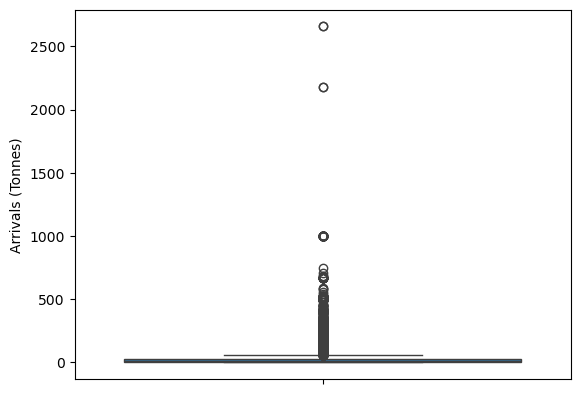

In [27]:
sns.boxplot(df['Arrivals (Tonnes)'])

Clearly we can see there are some outliers we can extract from that using IQR

<Axes: ylabel='Min Price (Rs./Quintal)'>

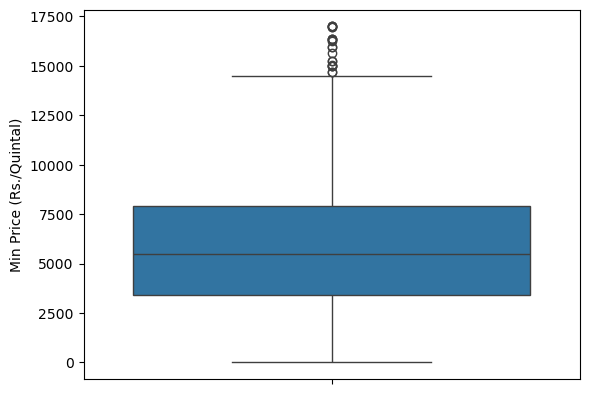

In [29]:
sns.boxplot(df['Min Price (Rs./Quintal)'])

Here we can see clearly there are some outliers

<Axes: ylabel='Min Price (Rs./Quintal)'>

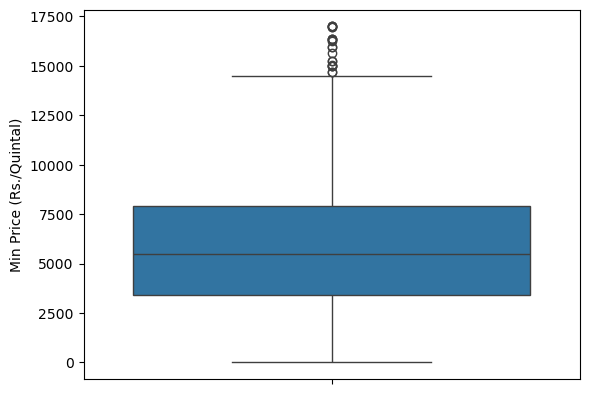

In [31]:
sns.boxplot(df['Min Price (Rs./Quintal)'])

Here also we can see clearly outliers we can has to check it from the IQR method

<Axes: ylabel='Modal Price (Rs./Quintal)'>

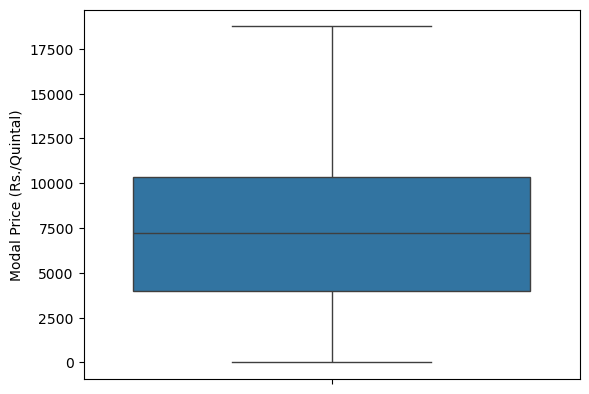

In [33]:
sns.boxplot(df['Modal Price (Rs./Quintal)'])

Here there are no outliers but it is better to check with IQR method

In [35]:
q1=df['Arrivals (Tonnes)'].quantile(0.25)
q3=df['Arrivals (Tonnes)'].quantile(0.75)
IQR=q3-q1
lowerbound=q1-1.5*IQR
upperbound=q1+1.5*IQR
outliers=df[(df['Arrivals (Tonnes)']<lowerbound) | (df['Arrivals (Tonnes)']>upperbound)]
print(outliers)

                   State Name District Name Market Name Variety   Group  \
Reported Date                                                             
2020-01-31     Andhra Pradesh        Amreli      Amreli   Other  Spices   
2007-03-06     Andhra Pradesh       Kurnool       Adoni   Other  Spices   
2007-03-05     Andhra Pradesh       Kurnool       Adoni   Other  Spices   
2020-01-30     Andhra Pradesh        Amreli      Amreli   Other  Spices   
2020-01-29     Andhra Pradesh       Kurnool     Kurnool   Other  Spices   
...                       ...           ...         ...     ...     ...   
2005-07-23          Telangana      Adilabad    Asifabad   Other  Spices   
2005-07-22          Telangana      Adilabad    Asifabad   Other  Spices   
2009-07-05      Uttar Pradesh    Pratapgarh  Pratapgarh   Other  Spices   
2011-12-11      Uttar Pradesh    Pratapgarh  Pratapgarh   Other  Spices   
2011-12-18      Uttar Pradesh    Pratapgarh  Pratapgarh   Other  Spices   

               Arrivals 

- These are considerable values

In [37]:
q1=df['Min Price (Rs./Quintal)'].quantile(0.25)
q3=df['Min Price (Rs./Quintal)'].quantile(0.75)
IQR=q3-q1
lowerbound=q1-1.5*IQR
upperbound=q1+1.5*IQR
outliers=df[(df['Min Price (Rs./Quintal)']<lowerbound) | (df['Min Price (Rs./Quintal)']>upperbound)]
print(outliers)

                   State Name District Name Market Name Variety   Group  \
Reported Date                                                             
2016-07-12     Andhra Pradesh   Chittorgarh    Jamnagar   Other  Spices   
2016-07-15     Andhra Pradesh    Banaskanth     Dhanera   Other  Spices   
2016-07-29     Andhra Pradesh         Akola        Akot   Other  Spices   
2016-08-12     Andhra Pradesh         Akola        Akot   Other  Spices   
2016-06-24     Andhra Pradesh    Banaskanth     Dhanera   Other  Spices   
...                       ...           ...         ...     ...     ...   
2010-05-30          Rajasthan   Chittorgarh  Pratapgarh   Other  Spices   
2010-07-02          Rajasthan   Chittorgarh        Akot   Other  Spices   
2016-04-01          Telangana   Ranga Reddy   Vikarabad   Other  Spices   
2016-03-31          Telangana   Ranga Reddy   Vikarabad   Other  Spices   
2015-03-31          Telangana   Ranga Reddy   Marapally   Other  Spices   

               Arrivals 

- These are considerable outliers

In [39]:
q1=df['Max Price (Rs./Quintal)'].quantile(0.25)
q3=df['Max Price (Rs./Quintal)'].quantile(0.75)
IQR=q3-q1
lowerbound=q1-1.5*IQR
upperbound=q1+1.5*IQR
outliers=df[(df['Max Price (Rs./Quintal)']<lowerbound) | (df['Max Price (Rs./Quintal)']>upperbound)]
print(outliers)

                   State Name District Name Market Name Variety   Group  \
Reported Date                                                             
2022-12-30     Andhra Pradesh   Chittorgarh     Kurnool   Other  Spices   
2021-08-06     Andhra Pradesh       Kurnool     Kurnool   Ajwan  Spices   
2021-07-13     Andhra Pradesh       Kurnool     Kurnool   Ajwan  Spices   
2016-07-12     Andhra Pradesh   Chittorgarh    Jamnagar   Other  Spices   
2016-07-15     Andhra Pradesh    Banaskanth     Dhanera   Other  Spices   
...                       ...           ...         ...     ...     ...   
2011-02-20          Rajasthan   Chittorgarh  Pratapgarh   Other  Spices   
2011-02-27          Rajasthan   Chittorgarh  Pratapgarh   Other  Spices   
2011-01-16          Rajasthan   Chittorgarh  Pratapgarh   Other  Spices   
2016-04-01          Telangana   Ranga Reddy   Vikarabad   Other  Spices   
2016-03-31          Telangana   Ranga Reddy   Vikarabad   Other  Spices   

               Arrivals 

- These values are considerable values

In [41]:
q1=df['Modal Price (Rs./Quintal)'].quantile(0.25)
q3=df['Modal Price (Rs./Quintal)'].quantile(0.75)
IQR=q3-q1
lowerbound=q1-1.5*IQR
upperbound=q1+1.5*IQR
outliers=df[(df['Modal Price (Rs./Quintal)']<lowerbound) | (df['Modal Price (Rs./Quintal)']>upperbound)]
print(outliers)

                   State Name District Name Market Name Variety   Group  \
Reported Date                                                             
2016-07-12     Andhra Pradesh   Chittorgarh    Jamnagar   Other  Spices   
2016-07-15     Andhra Pradesh    Banaskanth     Dhanera   Other  Spices   
2016-07-29     Andhra Pradesh         Akola        Akot   Other  Spices   
2016-08-09     Andhra Pradesh         Akola        Akot   Other  Spices   
2016-08-12     Andhra Pradesh         Akola        Akot   Other  Spices   
...                       ...           ...         ...     ...     ...   
2011-02-22          Rajasthan   Chittorgarh       Adoni   Other  Spices   
2011-02-24          Rajasthan   Chittorgarh       Adoni   Other  Spices   
2011-02-27          Rajasthan   Chittorgarh  Pratapgarh   Other  Spices   
2016-04-01          Telangana   Ranga Reddy   Vikarabad   Other  Spices   
2016-03-31          Telangana   Ranga Reddy   Vikarabad   Other  Spices   

               Arrivals 

- These are considerable values

<Axes: xlabel='Arrivals (Tonnes)', ylabel='Count'>

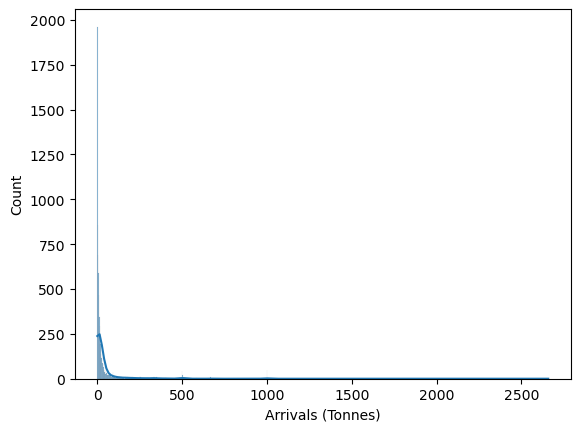

In [43]:
sns.histplot(df['Arrivals (Tonnes)'],kde=True)

- Clearly the Arrivals data is right skewed

<Axes: xlabel='Min Price (Rs./Quintal)', ylabel='Count'>

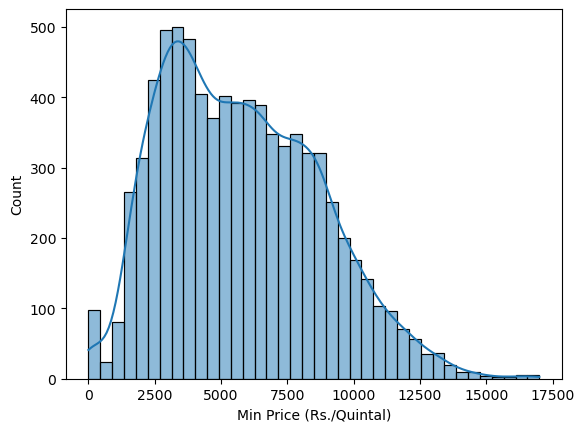

In [45]:
sns.histplot(df['Min Price (Rs./Quintal)'],kde=True)

- Here the data is moderately right skewed

<Axes: xlabel='Max Price (Rs./Quintal)', ylabel='Count'>

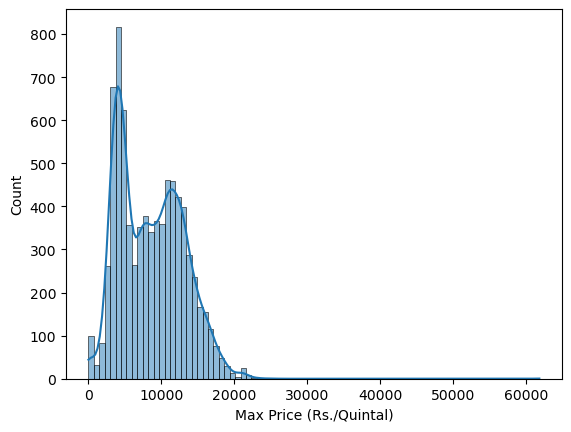

In [47]:
sns.histplot(df['Max Price (Rs./Quintal)'],kde=True)

- Here the data is slightly right skewed

# Exploratory Data Analysis

In [49]:
df_andhra=df[(df['State Name']=='Andhra Pradesh') & (df['Variety']=='Ajwan')]

In [50]:
df_andhra=df_andhra.sort_index(ascending=True)

**Q.Checking which market is getting higher Arrivals (Tonnes)**

In [52]:
higher_arrivals=df_andhra['Arrivals (Tonnes)'].groupby(df_andhra['Market Name']).agg([np.mean,np.min,np.max])

<Figure size 1200x1200 with 0 Axes>

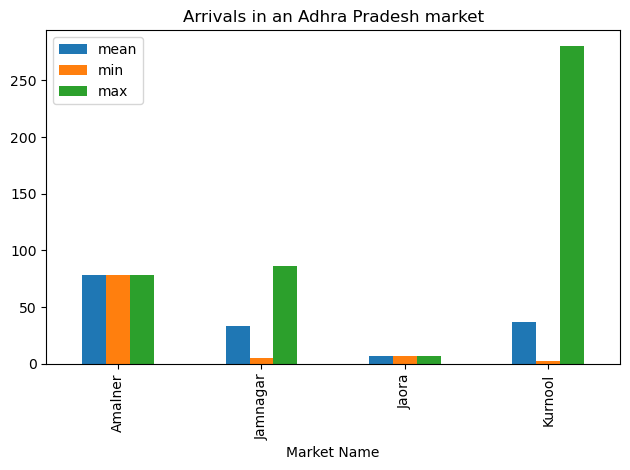

In [53]:
plt.figure(figsize=[12,12])
higher_arrivals.plot(kind='bar')
plt.title('Arrivals in an Adhra Pradesh market')
plt.tight_layout()
plt.show()

In [54]:
higher_arrivals['max'].sort_values(ascending=False)

Market Name
Kurnool     280.000
Jamnagar     86.050
Amalner      78.270
Jaora         6.805
Name: max, dtype: float64

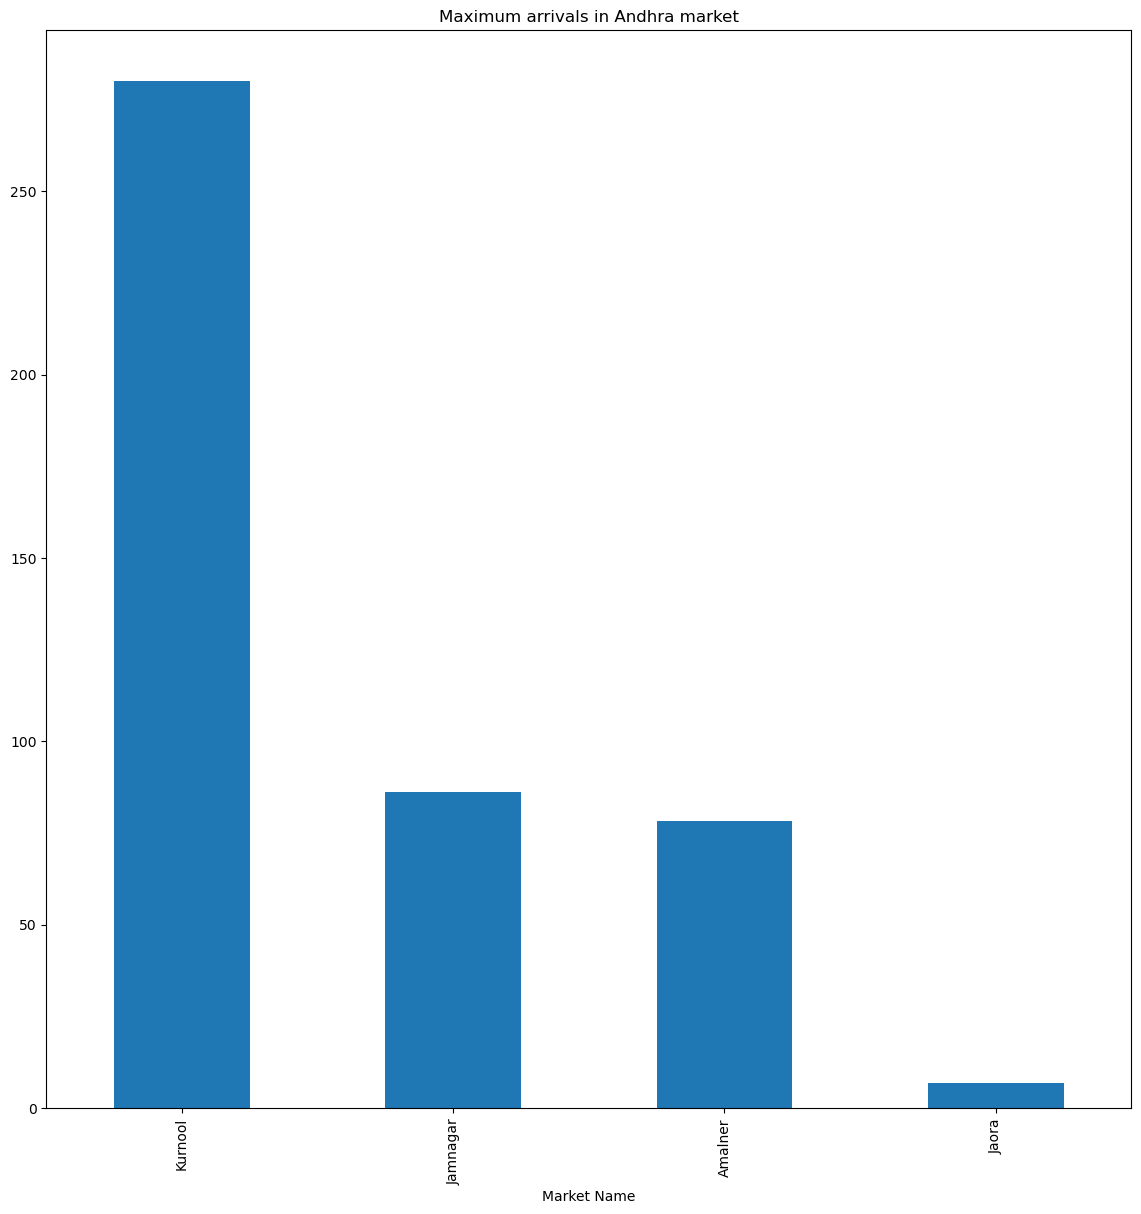

In [55]:
plt.figure(figsize=[14,14])
higher_arrivals['max'].sort_values(ascending=False).plot(kind='bar')
plt.title('Maximum arrivals in Andhra market')
plt.show()

- i andhra market most of the arrivals are occuring in bhailwara market with 2180
-  and the least is vijayanagarm

In [57]:
higher_arrivals['mean'].sort_values(ascending=False)

Market Name
Amalner     78.2700
Kurnool     37.1562
Jamnagar    33.5900
Jaora        6.8050
Name: mean, dtype: float64

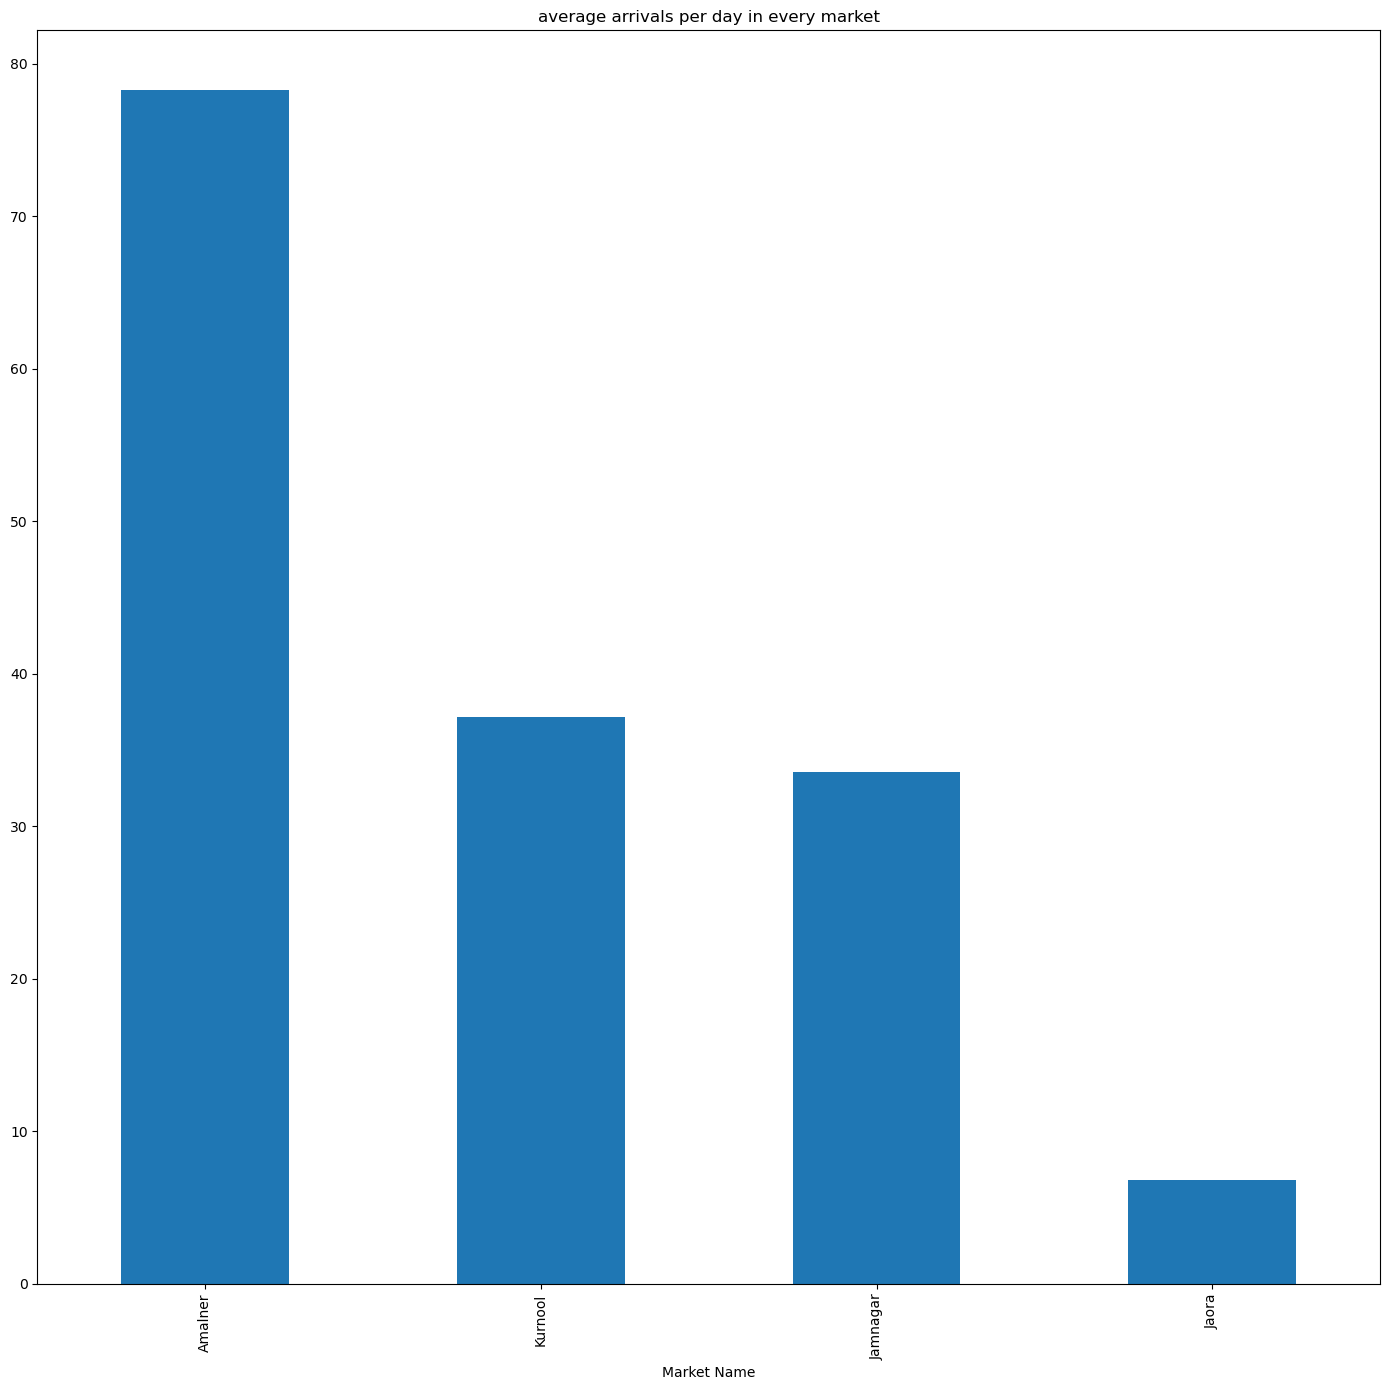

In [61]:
plt.figure(figsize=[14,14])
higher_arrivals['mean'].sort_values(ascending=False).plot(kind='bar')
plt.title('average arrivals per day in every market')
plt.tight_layout()
plt.show()

The daily avg arrivals are high in Anajngon market with 154
and the low is vijayanagaram with 0

**Q.Find in which month trend is increasing or constant**

In [64]:
andhra_month=df_andhra.groupby(['Market Name',df_andhra.index.month])[['Arrivals (Tonnes)','Max Price (Rs./Quintal)','Min Price (Rs./Quintal)','Modal Price (Rs./Quintal)']].mean()

In [65]:
andhra_month

Arrivals (Tonnes)  Max Price (Rs./Quintal)  \
Market Name Reported Date                                               
Amalner     3                      78.270000             13953.000000   
Jamnagar    9                      66.750000              3118.500000   
            10                     25.300000              3126.750000   
Jaora       11                      6.805000             13165.250000   
Kurnool     1                       7.240000             13533.250000   
            2                      87.053333             18480.333333   
            3                      68.006667             10551.666667   
            7                      35.794200             11575.660000   
            8                      43.590476             14954.619048   
            9                      11.635000             15393.125000   
            10                     58.015000              6705.718750   
            11                     16.202857             13688.976190   
            12                     13.516667             13426.444444   

                           Min Price (Rs./Quintal)  Modal Price (Rs./Quintal)  
Market Name Reported Date                                                      
Amalner     3                          6525.250000               10460.250000  
Jamnagar    9                          1932.500000                2387.500000  
            10                         2541.000000                2873.500000  
Jaora       11                         8787.500000               10463.500000  
Kurnool     1                          8250.000000               11917.750000  
            2                          5716.000000               11447.666667  
            3                          6499.000000                8641.666667  
            7                          4801.770000                9104.710000  
            8                          4862.119048               10414.190476  
            9                          5807.375000               12372.625000  
            10                         2633.750000                5014.656250  
            11                         7360.666667               10882.571429  
            12                         7016.111111               11291.388889

In [66]:
# Reset index so that Market Name & Month are normal columns
andhra_month = andhra_month.reset_index()

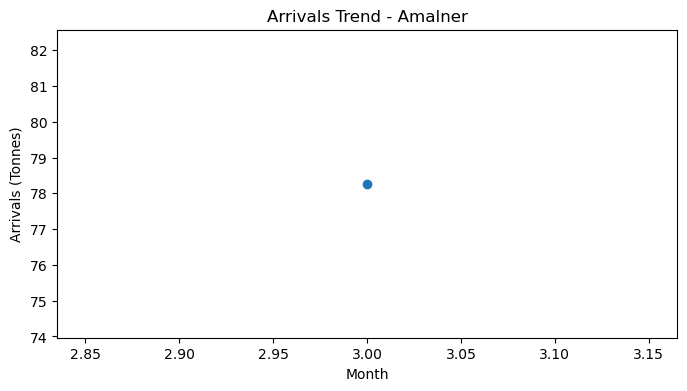

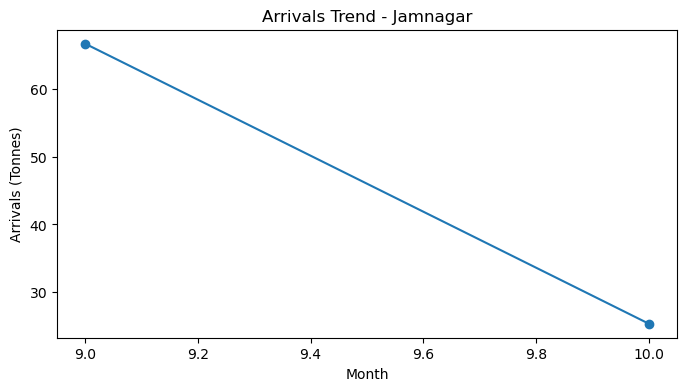

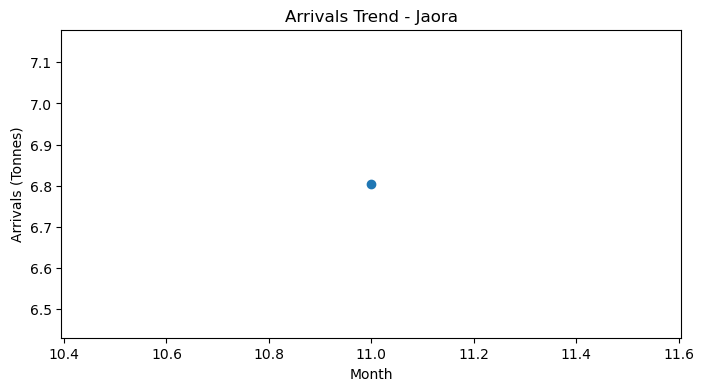

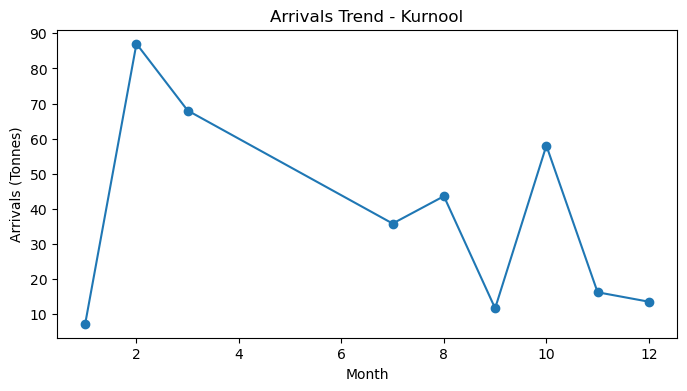

In [67]:
for name, group in andhra_month.groupby("Market Name"):
    plt.figure(figsize=(8,4))
    plt.plot(group["Reported Date"], group["Arrivals (Tonnes)"], marker="o")
    plt.title(f"Arrivals Trend - {name}")
    plt.xlabel("Month")
    plt.ylabel("Arrivals (Tonnes)")
    plt.show()

This is a Seasonal Trend in which for every 2nd month and 3 month are high only in kurnool

but jora jamnagar and amalner has only one datapoint to analysis

**Q.Finding the avg of min price per month in Andhra Pradesh**

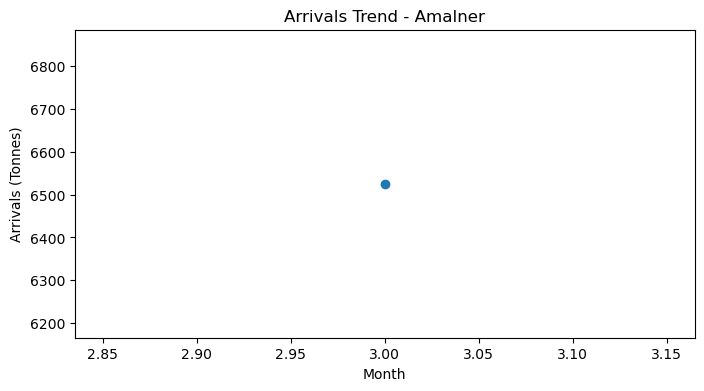

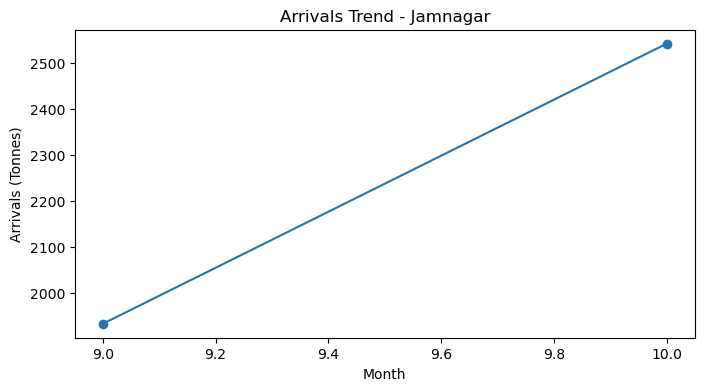

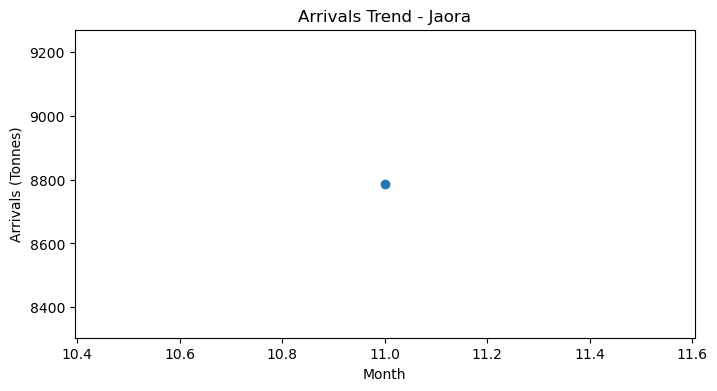

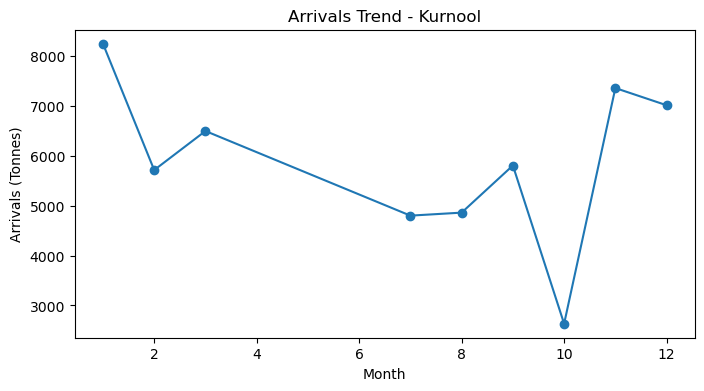

In [70]:
for name, group in andhra_month.groupby("Market Name"):
    plt.figure(figsize=(8,4))
    plt.plot(group["Reported Date"], group["Min Price (Rs./Quintal)"], marker="o")
    plt.title(f"Arrivals Trend - {name}")
    plt.xlabel("Month")
    plt.ylabel("Arrivals (Tonnes)")
    plt.show()

The Arrivals Trend in Kurnool shows a peak in Month 1, followed by a general decline until Month 10 where it hits a low, and then a sharp recovery in Months 11 and 12, ending the year with high arrivals.

but in jamnagar amalner jaora has low datapoints to analyse

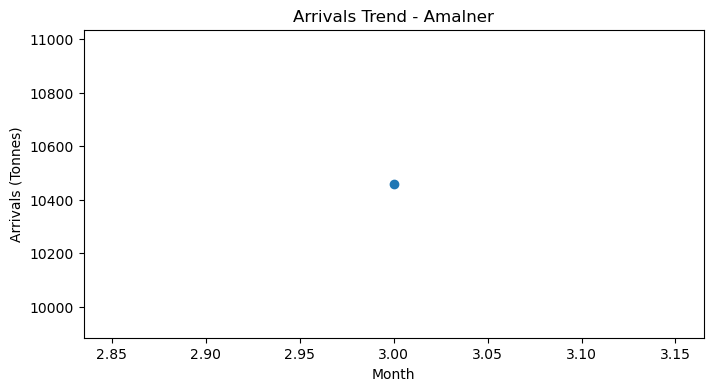

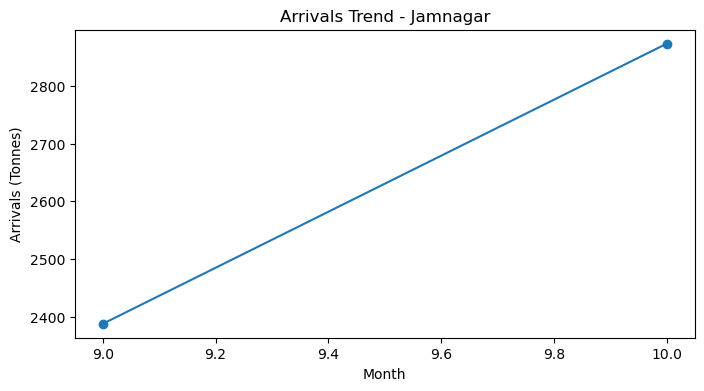

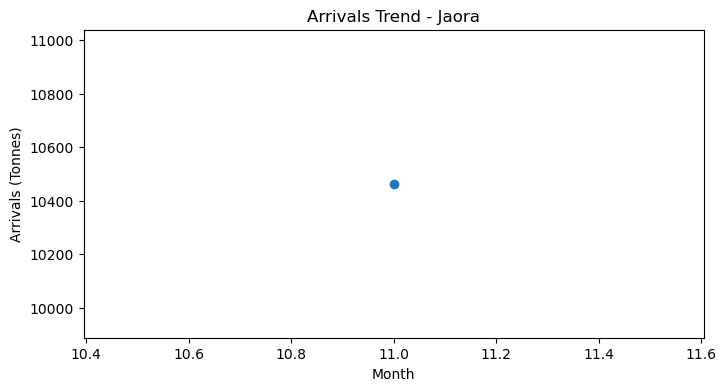

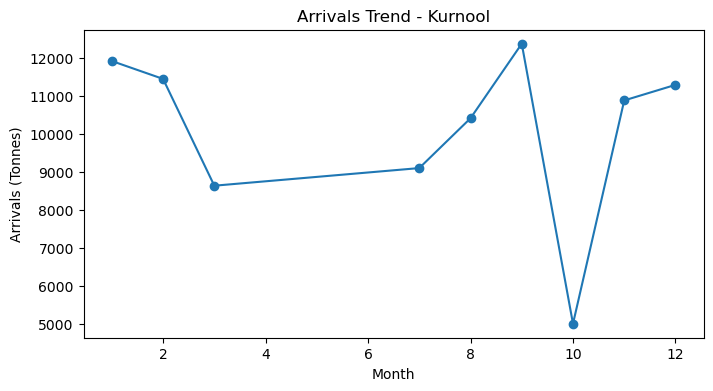

In [72]:
for name, group in andhra_month.groupby("Market Name"):
    plt.figure(figsize=(8,4))
    plt.plot(group["Reported Date"], group["Modal Price (Rs./Quintal)"], marker="o")
    plt.title(f"Arrivals Trend - {name}")
    plt.xlabel("Month")
    plt.ylabel("Arrivals (Tonnes)")
    plt.show()

The modal price also signifies as same as min price and max price where here also the trend of 1st and 2nd month signifies same but 4 to 7 months it shows constant eventhough it decreses

In [74]:
andhra_year=df_andhra.groupby(['Market Name',df_andhra.index.year])[['Arrivals (Tonnes)','Max Price (Rs./Quintal)','Min Price (Rs./Quintal)','Modal Price (Rs./Quintal)']].mean()

In [75]:
andhra_year=andhra_year.reset_index()


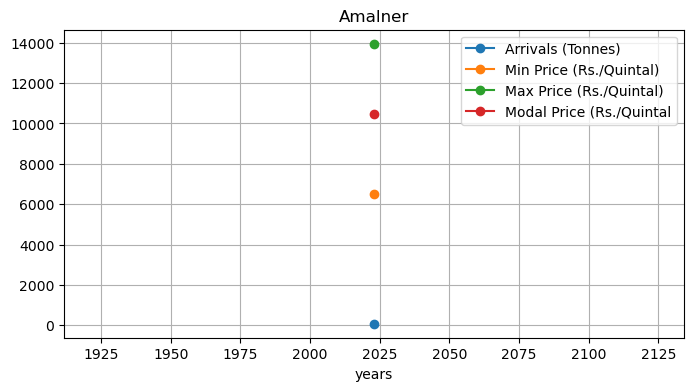

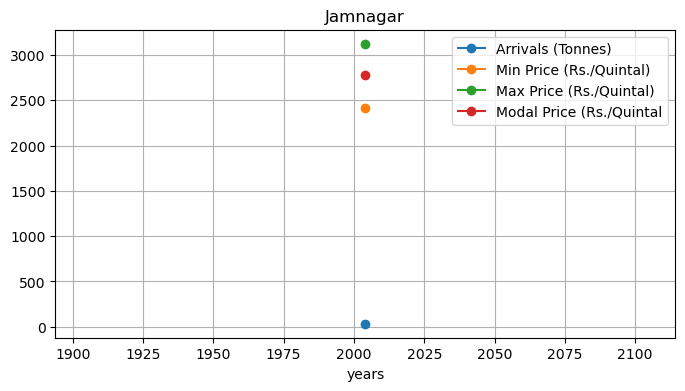

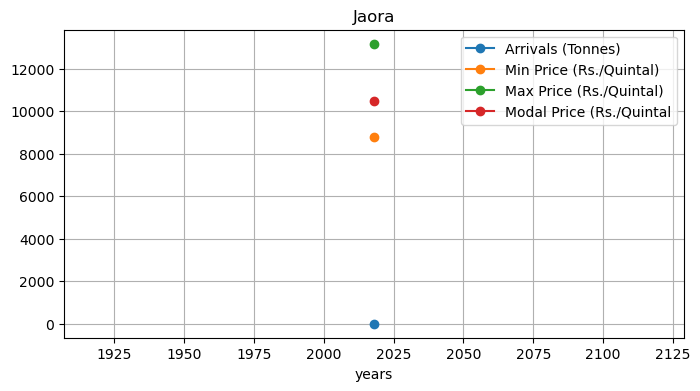

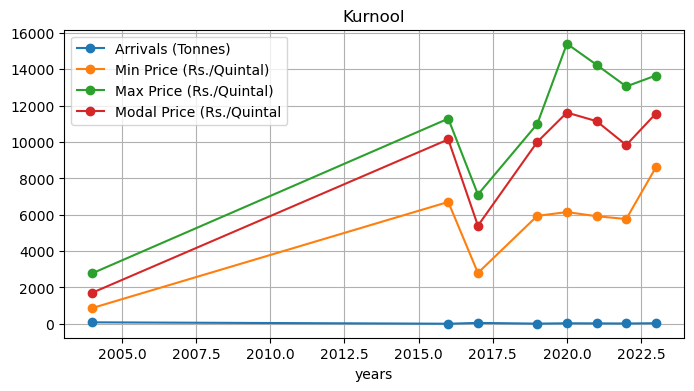

In [76]:
for name, group in andhra_year.groupby("Market Name"):
    plt.figure(figsize=(8,4))
    plt.plot(group['Reported Date'],group["Arrivals (Tonnes)"], marker="o",label='Arrivals (Tonnes)')
    plt.plot(group['Reported Date'],group['Min Price (Rs./Quintal)'],marker='o',label='Min Price (Rs./Quintal)')
    plt.plot(group['Reported Date'],group['Max Price (Rs./Quintal)'],marker='o',label='Max Price (Rs./Quintal)')
    plt.plot(group['Reported Date'],group['Modal Price (Rs./Quintal)'],marker='o',label='Modal Price (Rs./Quintal')
    plt.title(name)
    plt.legend()
    plt.xlabel("years")
    plt.grid()
    plt.show()

Here the min price ,max price and model price are increses year by year 

In [78]:
higher_arrivals['mean'].sort_values(ascending=False)

Market Name
Amalner     78.2700
Kurnool     37.1562
Jamnagar    33.5900
Jaora        6.8050
Name: mean, dtype: float64

- The daily avg arrivals are high in Anajngon market with 154
- and the low is vijayanagaram with 0

**Q.Trend analysis.**

**What is the trend of Ajwan arrivals from January to June across different years in Andhra Prasedh markets?**

In [81]:
df_jan_june = df_andhra[df_andhra.index.month.isin([1,2,3,4,5,6])]

In [82]:
df_jan_june.drop(columns=['State Name','Group'],inplace=True)

In [83]:
df_Ajwan=df_jan_june[df_jan_june['Variety']=='Ajwan']

In [84]:
ajwan_year_mean=df_Ajwan.groupby(df_Ajwan.index.year)['Arrivals (Tonnes)'].mean()

In [85]:
ajwan_year_mean

Reported Date
2020    101.575000
2021     24.163333
2023     73.138333
Name: Arrivals (Tonnes), dtype: float64

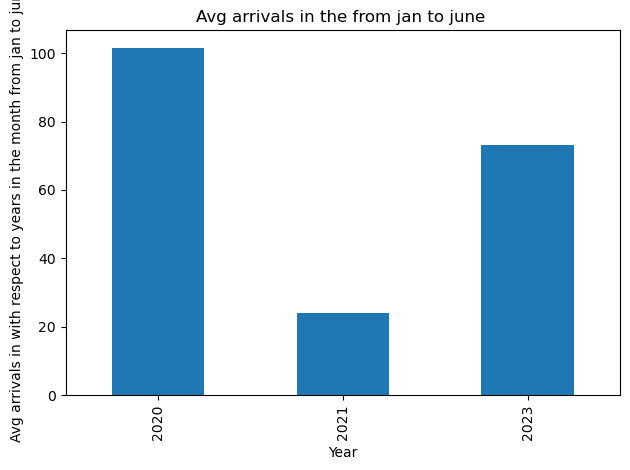

In [86]:
ajwan_year_mean.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Avg arrivals in with respect to years in the month from jan to june')
plt.title('Avg arrivals in the from jan to june ')
plt.tight_layout()
plt.show()

- Based on this dataset in the year of 2020 is high with more than 100
- And 2019 has least

**Q.Inspect Why in the year 2020 has higher arrivals and why 2019 has low arrivals for Ajwan particularly in the month from jan to jun**

In [89]:
arrivals_high=df_Ajwan[df_Ajwan.index.year==2020]

In [90]:
arrivals_high.head(10)

District Name Market Name Variety  Arrivals (Tonnes)  \
Reported Date                                                        
2020-02-10          Kurnool     Kurnool   Ajwan              95.37   
2020-02-19          Kurnool     Kurnool   Ajwan             107.78   

               Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
Reported Date                                                     
2020-02-10                      4372.5                  17802.0   
2020-02-19                      5526.0                  16655.0   

               Modal Price (Rs./Quintal)  
Reported Date                             
2020-02-10                       10299.5  
2020-02-19                       10244.0

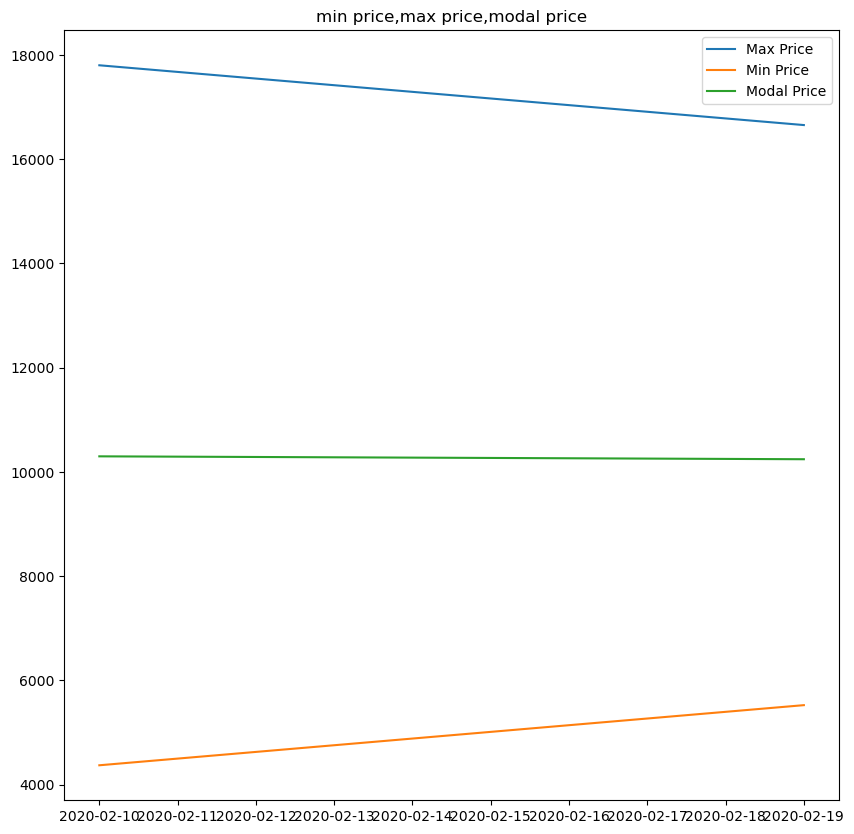

In [98]:
plt.figure(figsize=[10,10])
plt.plot(arrivals_high.index,arrivals_high['Max Price (Rs./Quintal)'],label='Max Price')
plt.plot(arrivals_high.index,arrivals_high['Min Price (Rs./Quintal)'],label='Min Price')
plt.plot(arrivals_high.index,arrivals_high['Modal Price (Rs./Quintal)'],label='Modal Price')
plt.title('min price,max price,modal price')
plt.legend()
plt.show()

- in 2020 the prices are high but the data in 2020 is low

In [100]:
arrivals_low=df_Ajwan[df_Ajwan.index.year==2019]
arrivals_low

Empty DataFrame
Columns: [District Name, Market Name, Variety, Arrivals (Tonnes), Min Price (Rs./Quintal), Max Price (Rs./Quintal), Modal Price (Rs./Quintal)]
Index: []

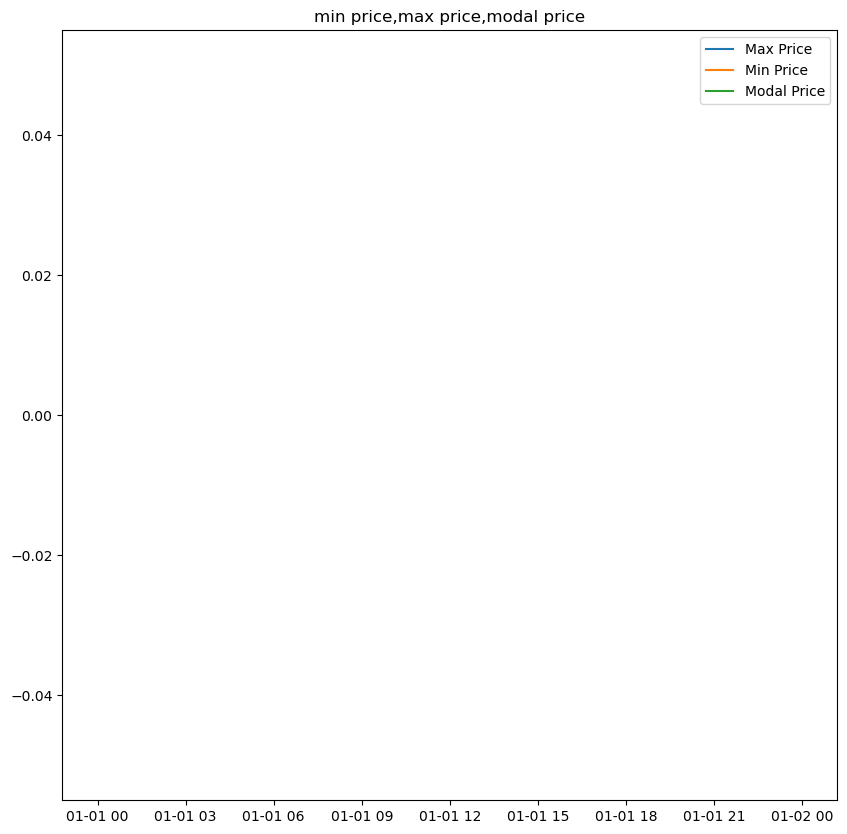

In [101]:
plt.figure(figsize=[10,10])
plt.plot(arrivals_low.index,arrivals_low['Max Price (Rs./Quintal)'],label='Max Price')
plt.plot(arrivals_low.index,arrivals_low['Min Price (Rs./Quintal)'],label='Min Price')
plt.plot(arrivals_low.index,arrivals_low['Modal Price (Rs./Quintal)'],label='Modal Price')
plt.title('min price,max price,modal price')
plt.legend()
plt.show()

- Here also the data is repeated in which im having with constant values

**Q.Check how the arrivals and prices are in Gujarat state**

In [104]:
df_Gujarat=df[df['State Name']=='Gujarat']

In [105]:
df_Gujarat

State Name District Name Market Name Variety   Group  \
Reported Date                                                        
2019-06-16       Gujarat    Banaskanth      Pohari   Ajwan  Spices   
2018-12-03       Gujarat    Banaskanth     Dhanera   Ajwan  Spices   
2010-10-20       Gujarat      Jamnagar    Jamnagar   Other  Spices   
2019-05-22       Gujarat   Chittorgarh      Amreli   Ajwan  Spices   
2018-12-04       Gujarat        Amreli      Amreli   Other  Spices   
...                  ...           ...         ...     ...     ...   
2020-12-12       Gujarat        Amreli      Amreli   Ajwan  Spices   
2022-06-22       Gujarat        Amreli      Amreli   Ajwan  Spices   
2022-06-16       Gujarat       Mehsana        Kadi   Ajwan  Spices   
2020-11-06       Gujarat        Amreli      Amreli   Ajwan  Spices   
2020-12-16       Gujarat      Jamnagar    Jamnagar   Ajwan  Spices   

               Arrivals (Tonnes)  Min Price (Rs./Quintal)  \
Reported Date                                               
2019-06-16              4.600000              9550.250000   
2018-12-03             78.190000              6761.250000   
2010-10-20             10.933333              9217.000000   
2019-05-22             12.968889              7081.333333   
2018-12-04             11.342857              8109.857143   
...                          ...                      ...   
2020-12-12              1.360000              6101.666667   
2022-06-22             25.915000              4552.525000   
2022-06-16             38.854000              5370.020000   
2020-11-06              7.486667              6500.000000   
2020-12-16            140.010000             10812.500000   

               Max Price (Rs./Quintal)  Modal Price (Rs./Quintal)  
Reported Date                                                      
2019-06-16                12650.250000               11217.750000  
2018-12-03                10781.000000                8970.000000  
2010-10-20                11383.333333               10126.666667  
2019-05-22                10521.666667                8937.222222  
2018-12-04                12979.285714               10134.714286  
...                                ...                        ...  
2020-12-12                 9200.000000                8843.333333  
2022-06-22                 8684.000000                7407.500000  
2022-06-16                 9200.000000                8106.600000  
2020-11-06                13395.000000                9833.333333  
2020-12-16                14012.500000               11781.500000  

[3012 rows x 9 columns]

**Q.Checking in which Gujarat Market has highest arrivals**

In [107]:
high_arrivals=df_Gujarat.groupby('Market Name')['Arrivals (Tonnes)'].agg([np.mean,np.min,np.max])

In [108]:
high_arrivals['mean'].sort_values(ascending=True)

Market Name
Savarkundla                    0.100000
Bhatiya                        0.120000
Mahuva(Station Road)           0.200000
Javad                          0.460000
Mandal                         1.505000
Dhanera(Veg,Yard Dhanera)      1.737500
Akola                          3.399167
Bhopal                         4.415000
Jam Khambalia                  4.825000
Lasur Station                  5.159000
Hyderabad (F&V)                7.480000
Pratapgarh                     7.990000
Dhragradhra                    8.659695
Madanganj Kishanganj           9.568750
Pohari                        10.734706
Nandurbar                     13.367500
Neemuch                       14.767679
Kadi                          14.987221
Manasa                        15.391840
Sailana                       15.400000
Jaora                         17.793476
Dasada Patadi                 18.639937
Tharad                        18.787500
Degana                        18.947500
Bhilwara                    

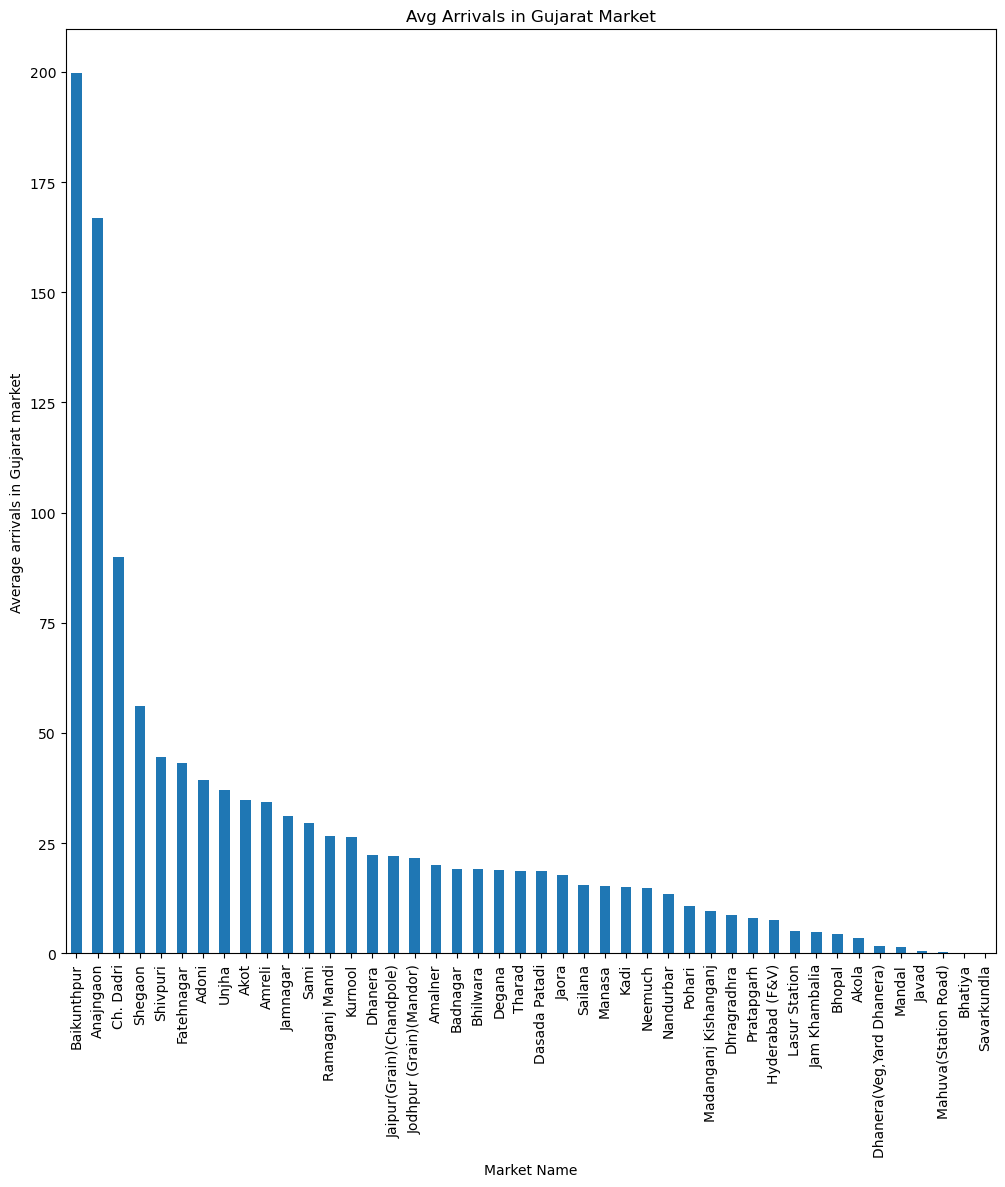

In [109]:
plt.figure(figsize=[12,12])
high_arrivals['mean'].sort_values(ascending=False).plot(kind='bar')
plt.title('Avg Arrivals in Gujarat Market')
plt.ylabel('Average arrivals in Gujarat market')
plt.xlabel('Market Name')
plt.show()

- Baikunthpur market has high avg arrivals per day
- And the lowest is savarkundha 

**Q.Finding the trend in which month through out the overall years the arrivals are high**

In [112]:
df_Gujarat=df_Gujarat[df_Gujarat['Variety']=='Ajwan']

In [113]:
arrivals_month=df_Gujarat.groupby(df_Gujarat.index.month)['Arrivals (Tonnes)'].mean()

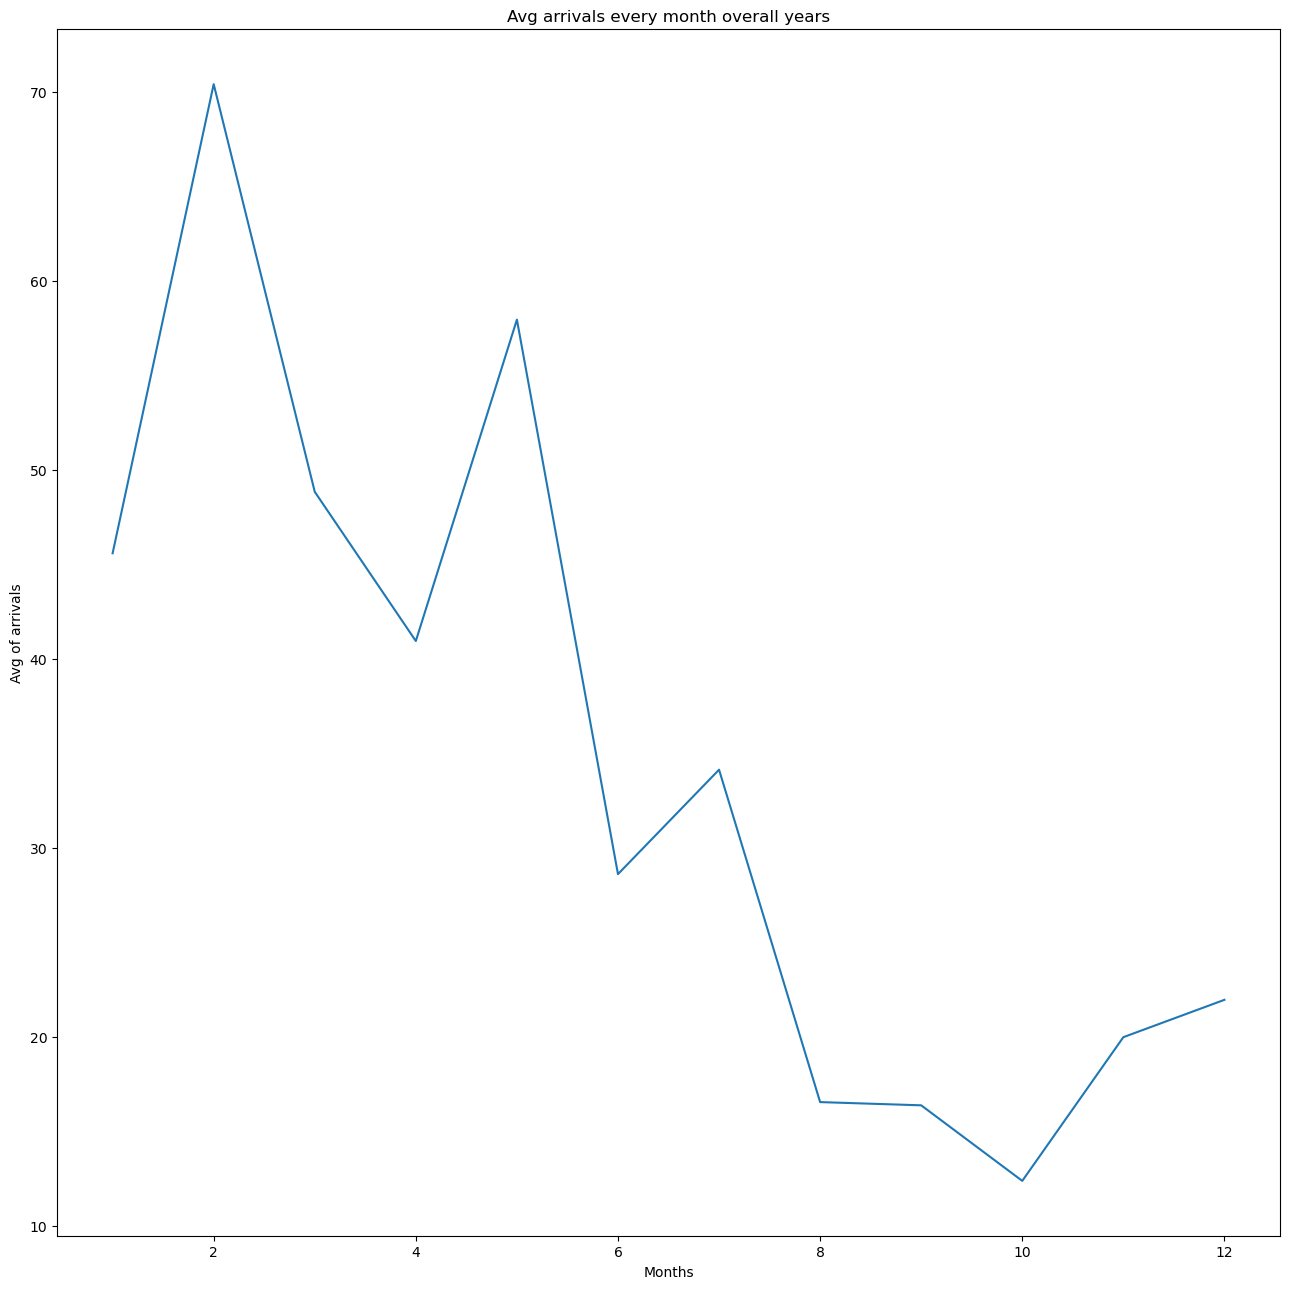

In [114]:
plt.figure(figsize=[13,13])
arrivals_month.plot(kind='line')
plt.title('Avg arrivals every month overall years')
plt.xlabel('Months')
plt.ylabel('Avg of arrivals')
plt.tight_layout()


- clearly if we see the first 5 months are high

**Q.How the trend of Ajmer since from the past years**

In [117]:
Gujarat_year=df_Gujarat.groupby(df_Gujarat.index.year)['Arrivals (Tonnes)'].mean()

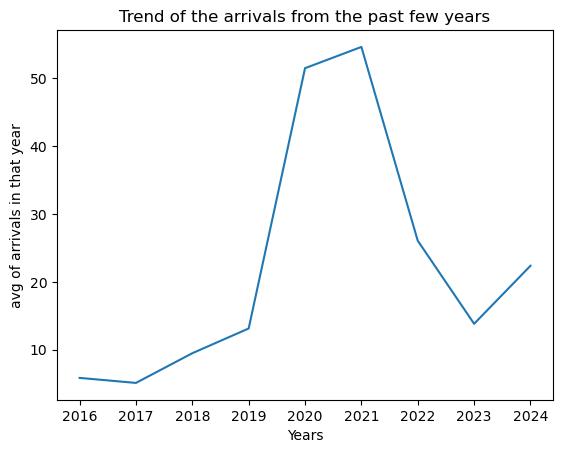

In [118]:
Gujarat_year.plot(kind='line')
plt.xlabel('Years')
plt.ylabel('avg of arrivals in that year')
plt.title('Trend of the arrivals from the past few years')
plt.show()

**from the last 2 years it is moderately decresing and increasing in Gujarat market**

**Q.why in the year 2021 is high and 2023 is low**

In [121]:
arrivals_high=df_Gujarat[df_Gujarat.index.year==2021]

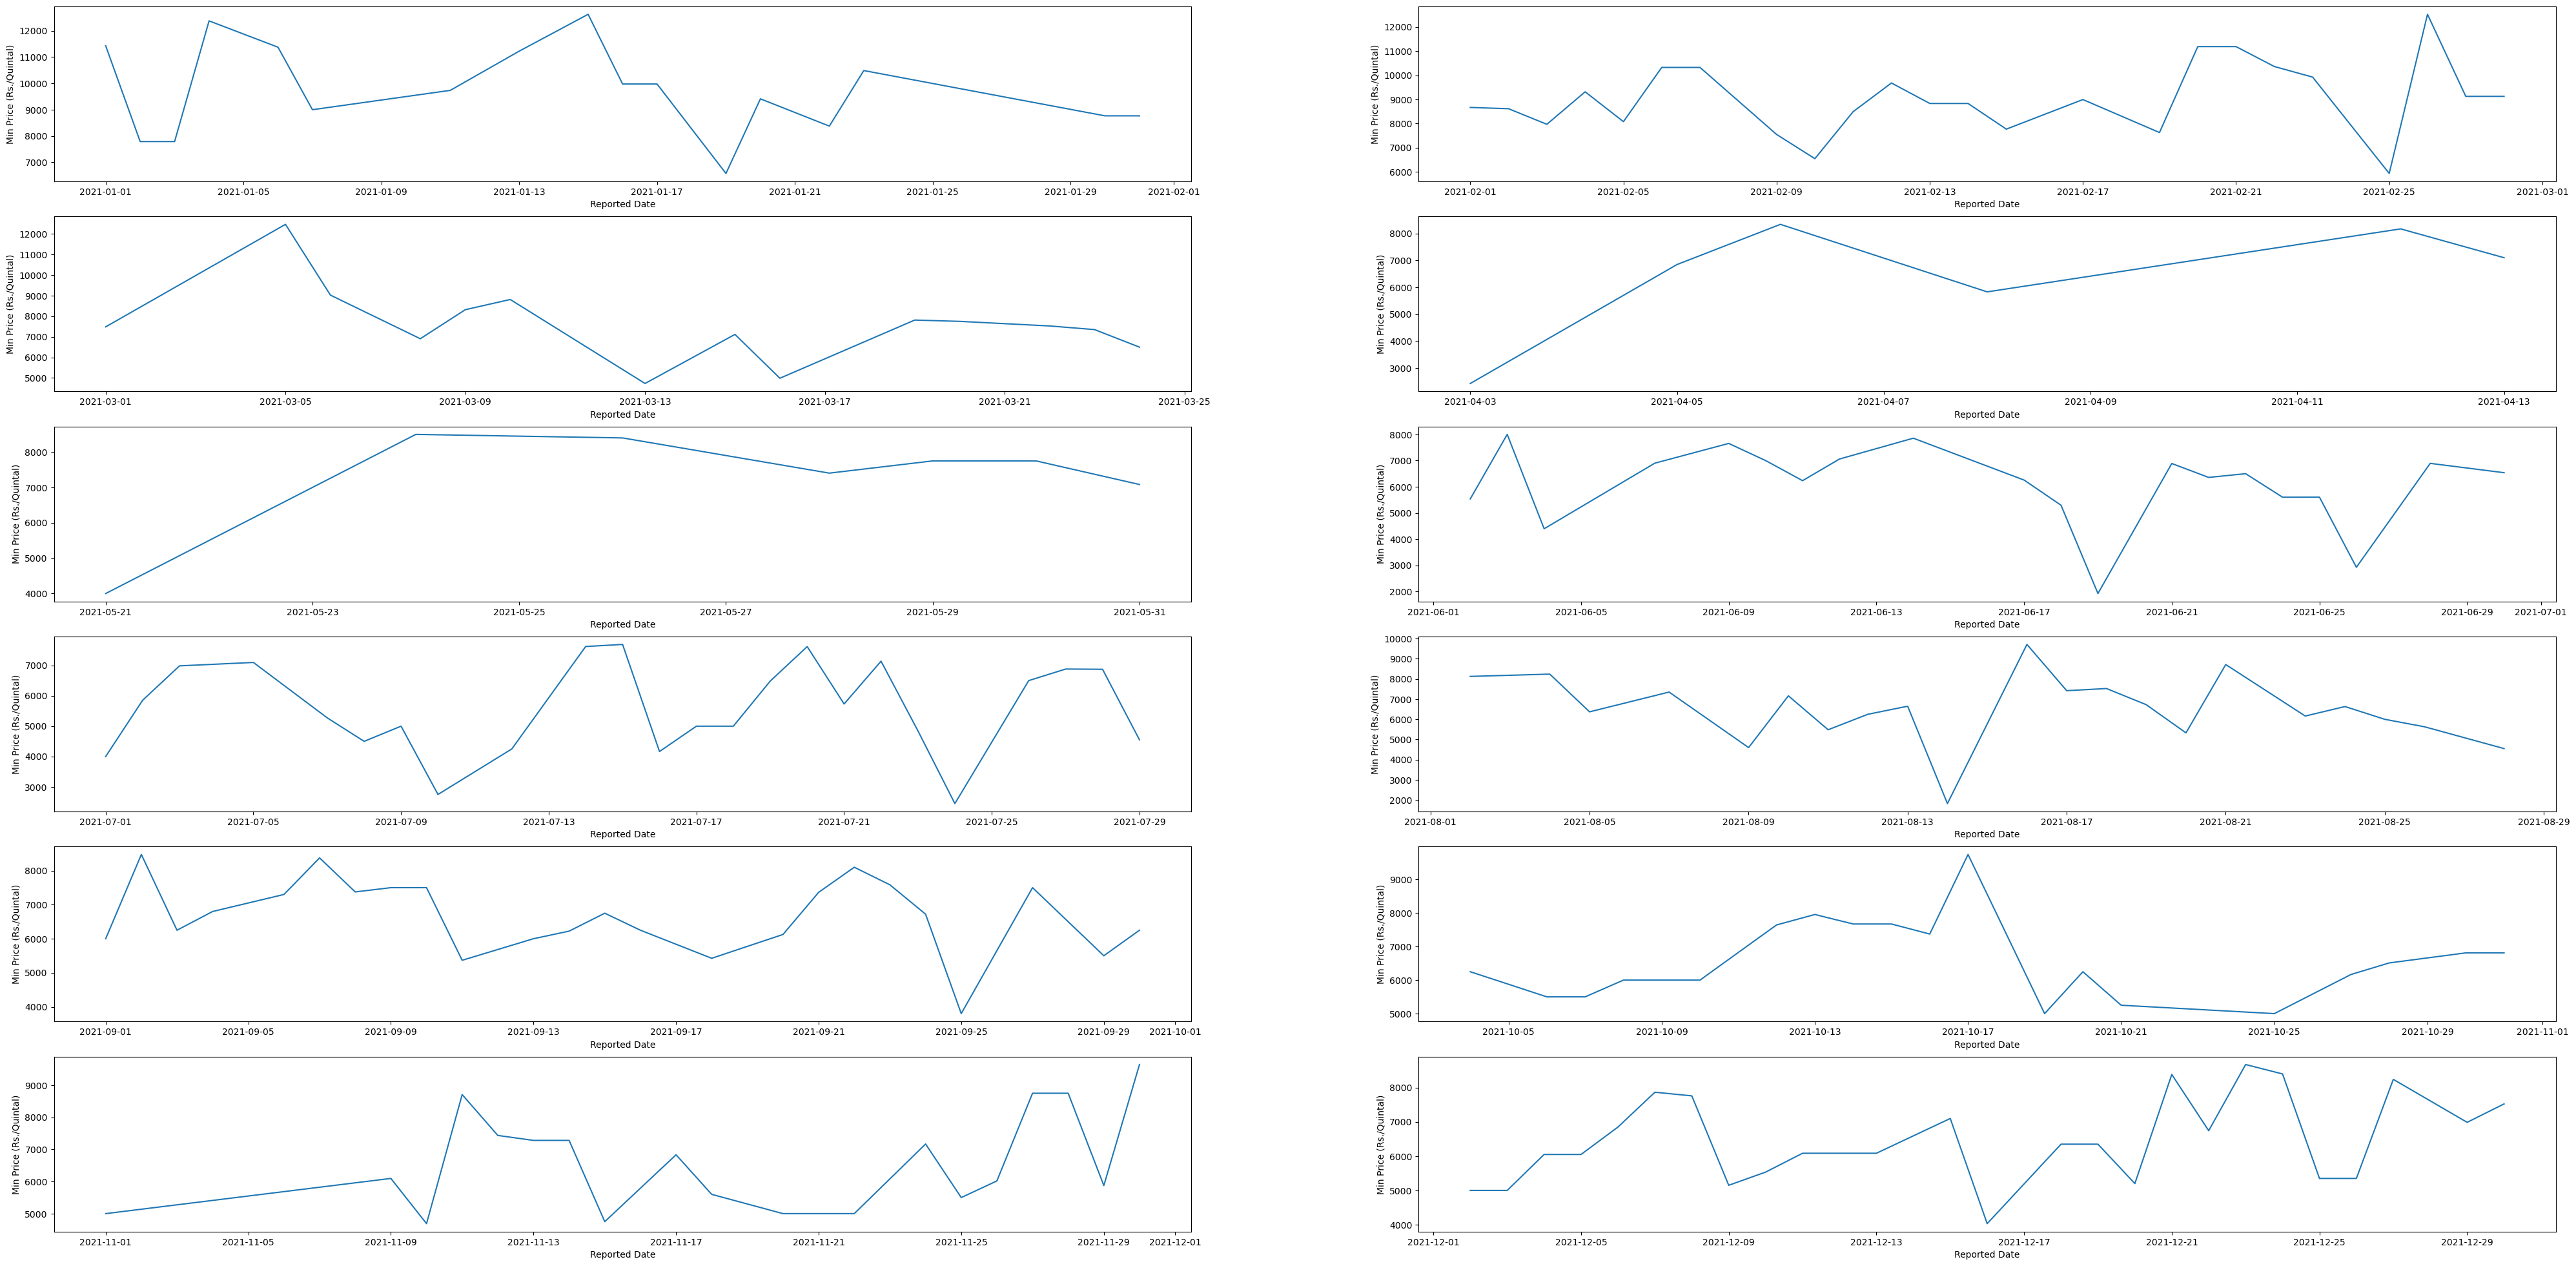

In [122]:
plt.figure(figsize=[50,50])
for i in range(1, 13):
    plt.subplot(12, 2, i)
    start = pd.to_datetime(f"2021-{i:02d}-01")
    end   = start + pd.offsets.MonthEnd(0)
    mask = (arrivals_high.index >= start) & (arrivals_high.index <= end)    
    sns.lineplot(
        x=arrivals_high.index[mask],
        y=arrivals_high.loc[mask, 'Min Price (Rs./Quintal)']
    )

Clearly if we see fourth and fifth month have some constant min support price trend 

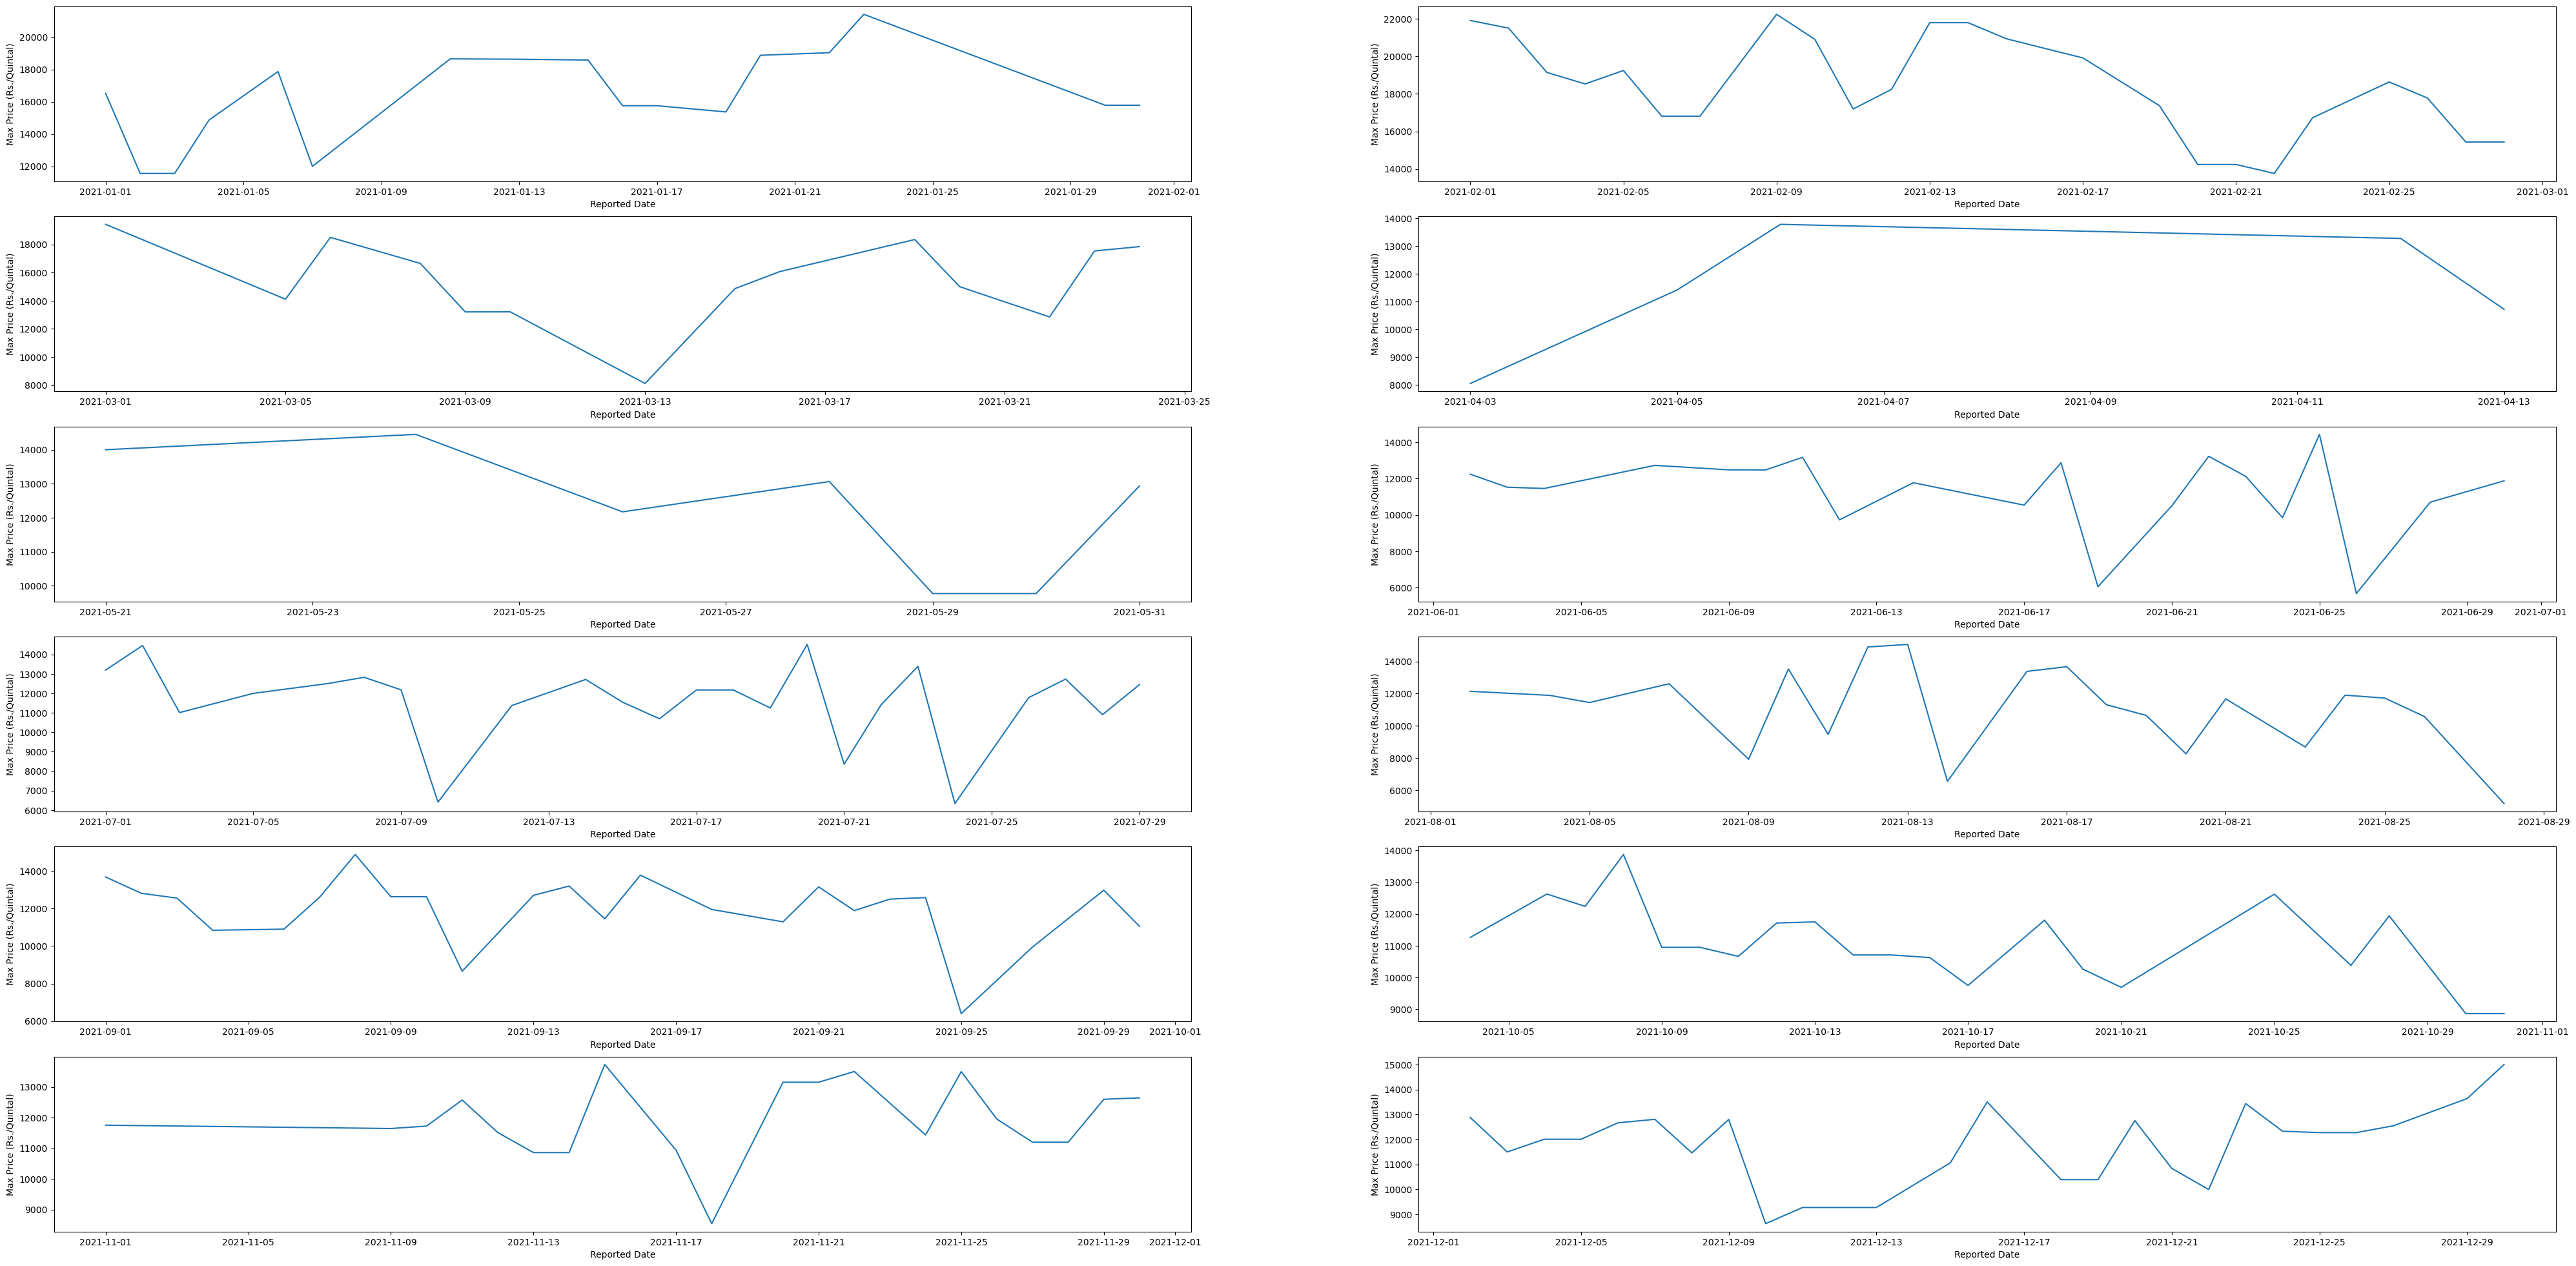

In [124]:
plt.figure(figsize=[50,50])
for i in range(1, 13):
    plt.subplot(12, 2, i)
    start = pd.to_datetime(f"2021-{i:02d}-01")
    end   = start + pd.offsets.MonthEnd(0)
    mask = (arrivals_high.index >= start) & (arrivals_high.index <= end)    
    sns.lineplot(
        x=arrivals_high.index[mask],
        y=arrivals_high.loc[mask, 'Max Price (Rs./Quintal)']
    )

Clearly we can see here also in the same months of fourth and fifth  have some constant max price trend

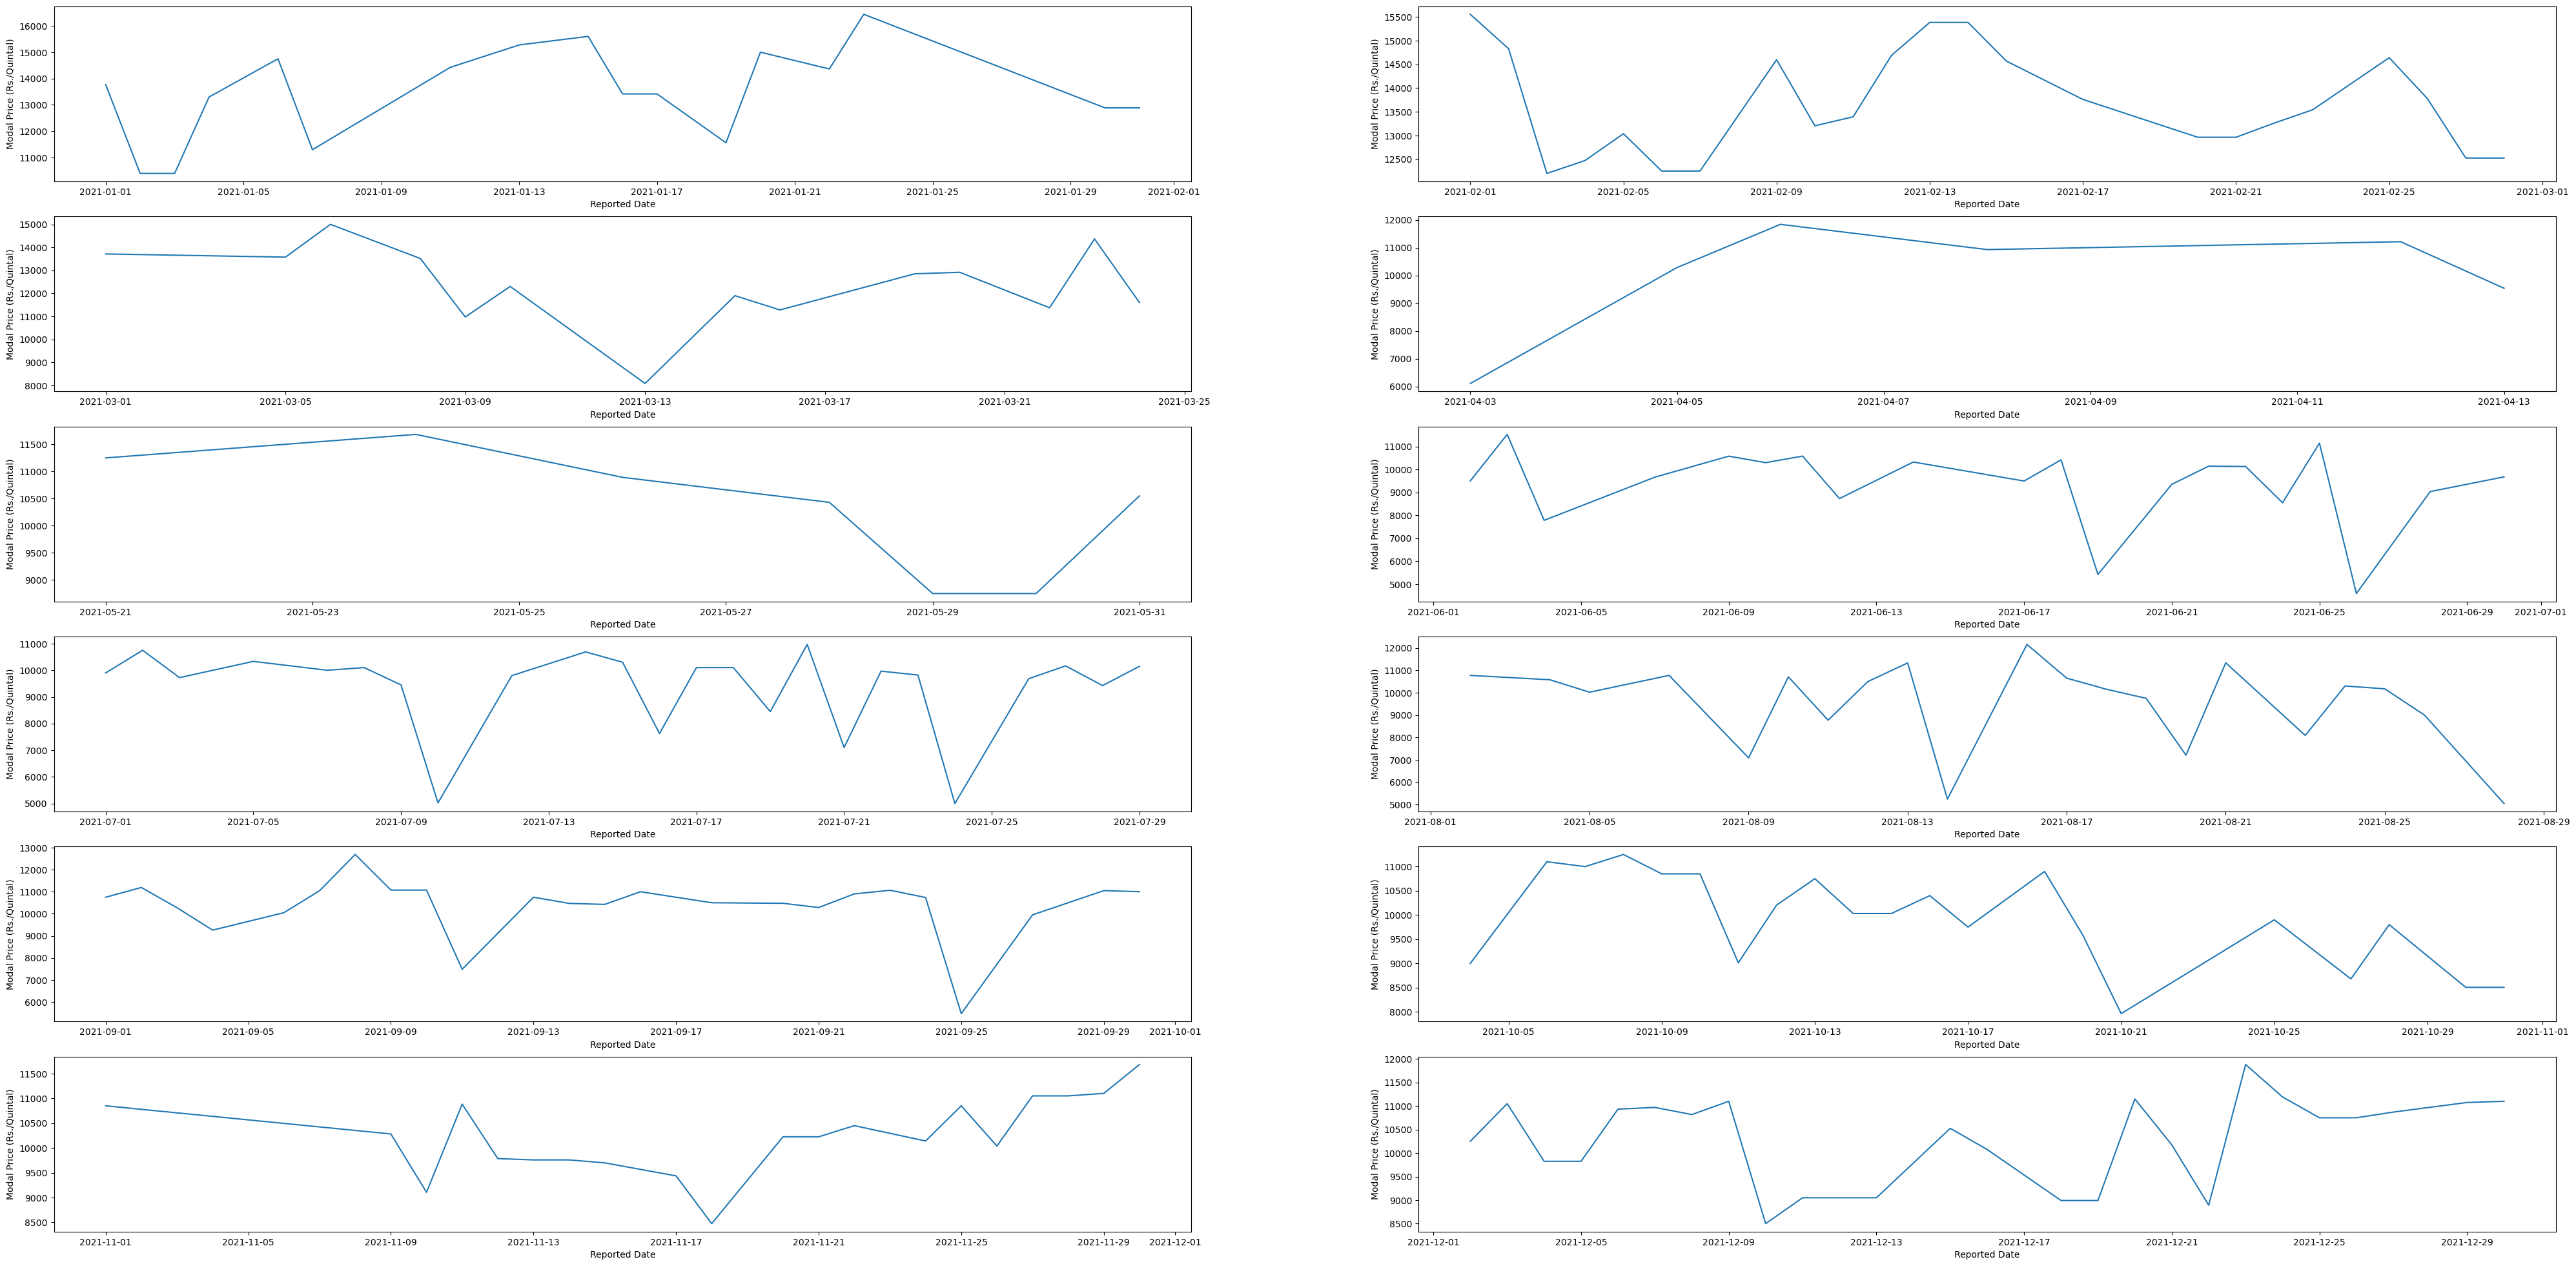

In [126]:
plt.figure(figsize=[50,50])
for i in range(1, 13):
    plt.subplot(12, 2, i)
    start = pd.to_datetime(f"2021-{i:02d}-01")
    end   = start + pd.offsets.MonthEnd(0)
    mask = (arrivals_high.index >= start) & (arrivals_high.index <= end)    
    sns.lineplot(
        x=arrivals_high.index[mask],
        y=arrivals_high.loc[mask, 'Modal Price (Rs./Quintal)']
    )

here also we can see in the same months the model pirce is some what is const with high increase 

**Q.In Gujarat why it is low in the year 2023**

In [129]:
arrivals_low=df_Gujarat[df_Gujarat.index.year==2023]

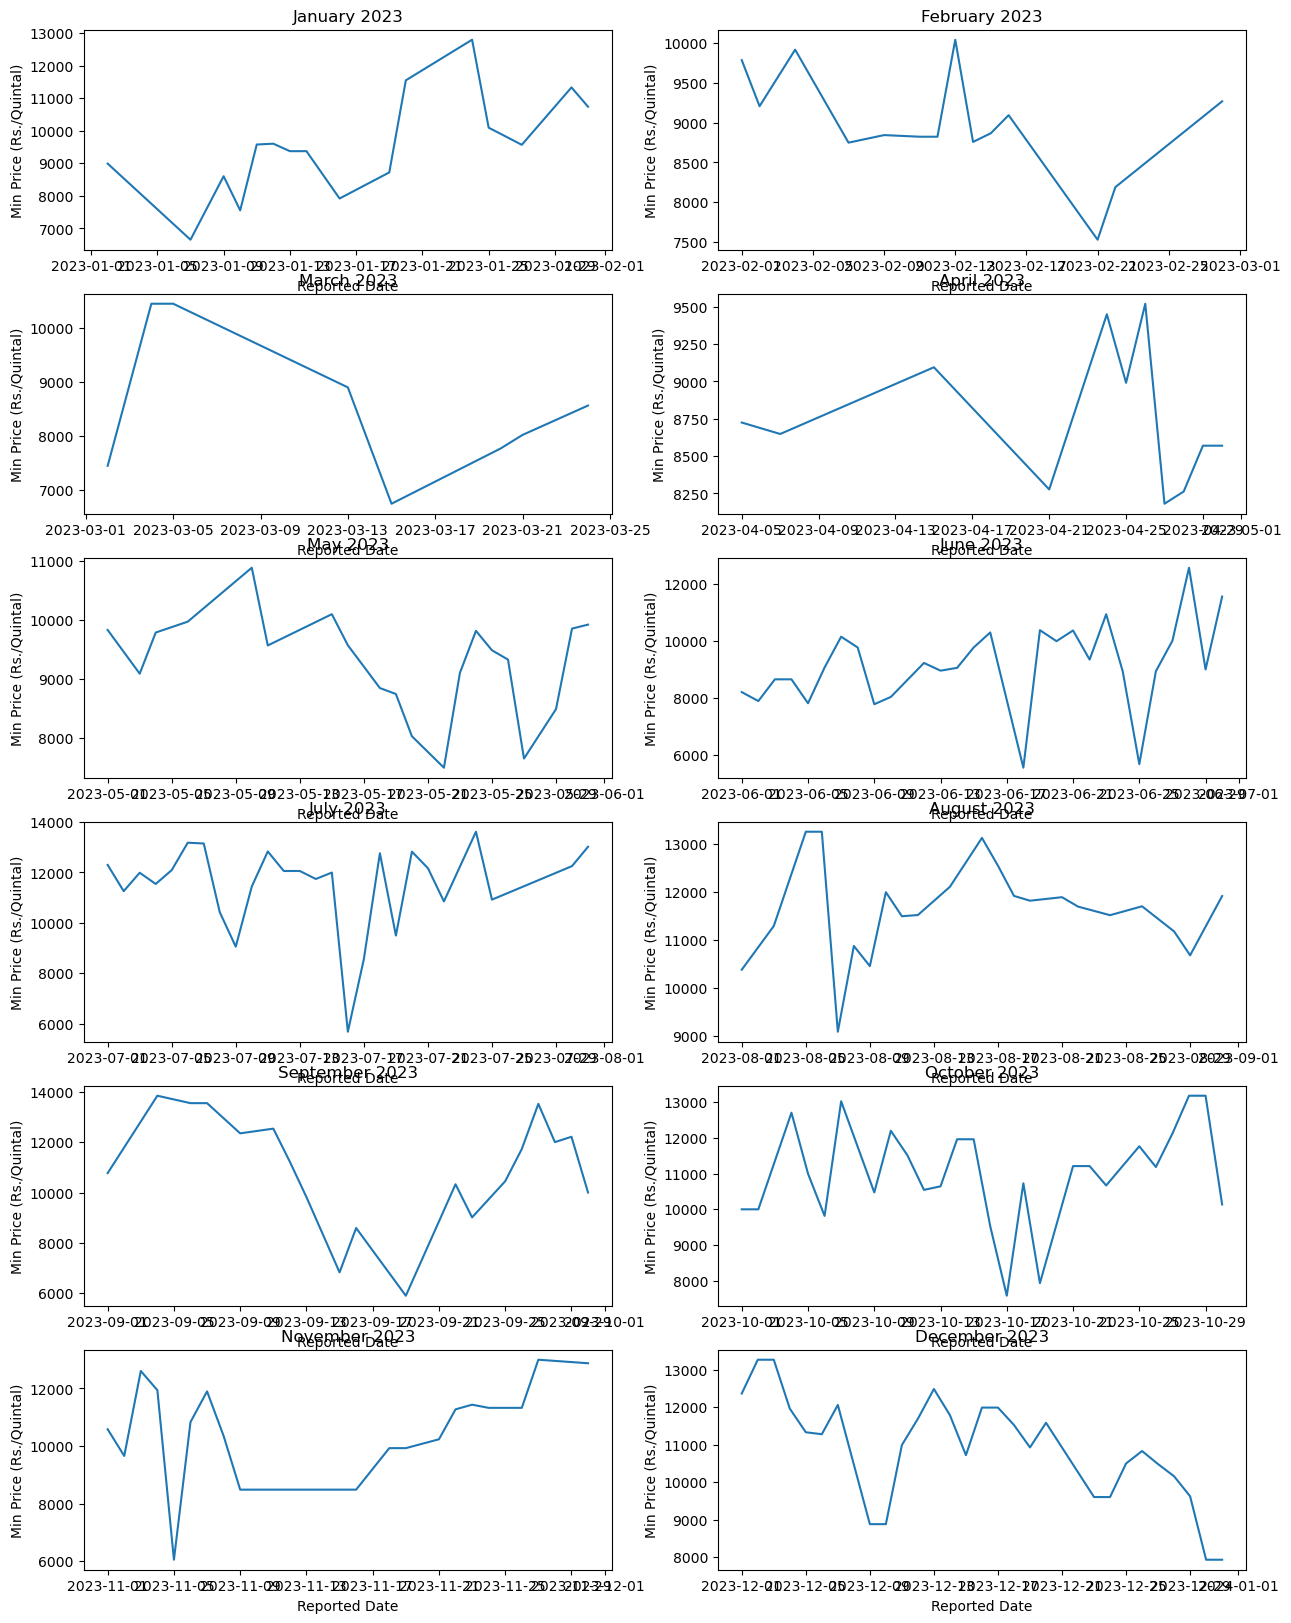

In [130]:
plt.figure(figsize=(15, 20))

for i in range(1, 13):
    start = pd.to_datetime(f"2023-{i:02d}-01")
    end   = start + pd.offsets.MonthEnd(0)
    mask = (arrivals_low.index >= start) & (arrivals_low.index <= end)

    if mask.sum() == 0:   # skip months with no data
        continue

    plt.subplot(6, 2, i)
    sns.lineplot(
        x=arrivals_low.index[mask],
        y=arrivals_low.loc[mask, 'Min Price (Rs./Quintal)']
    )
    plt.title(start.strftime("%B %Y"))

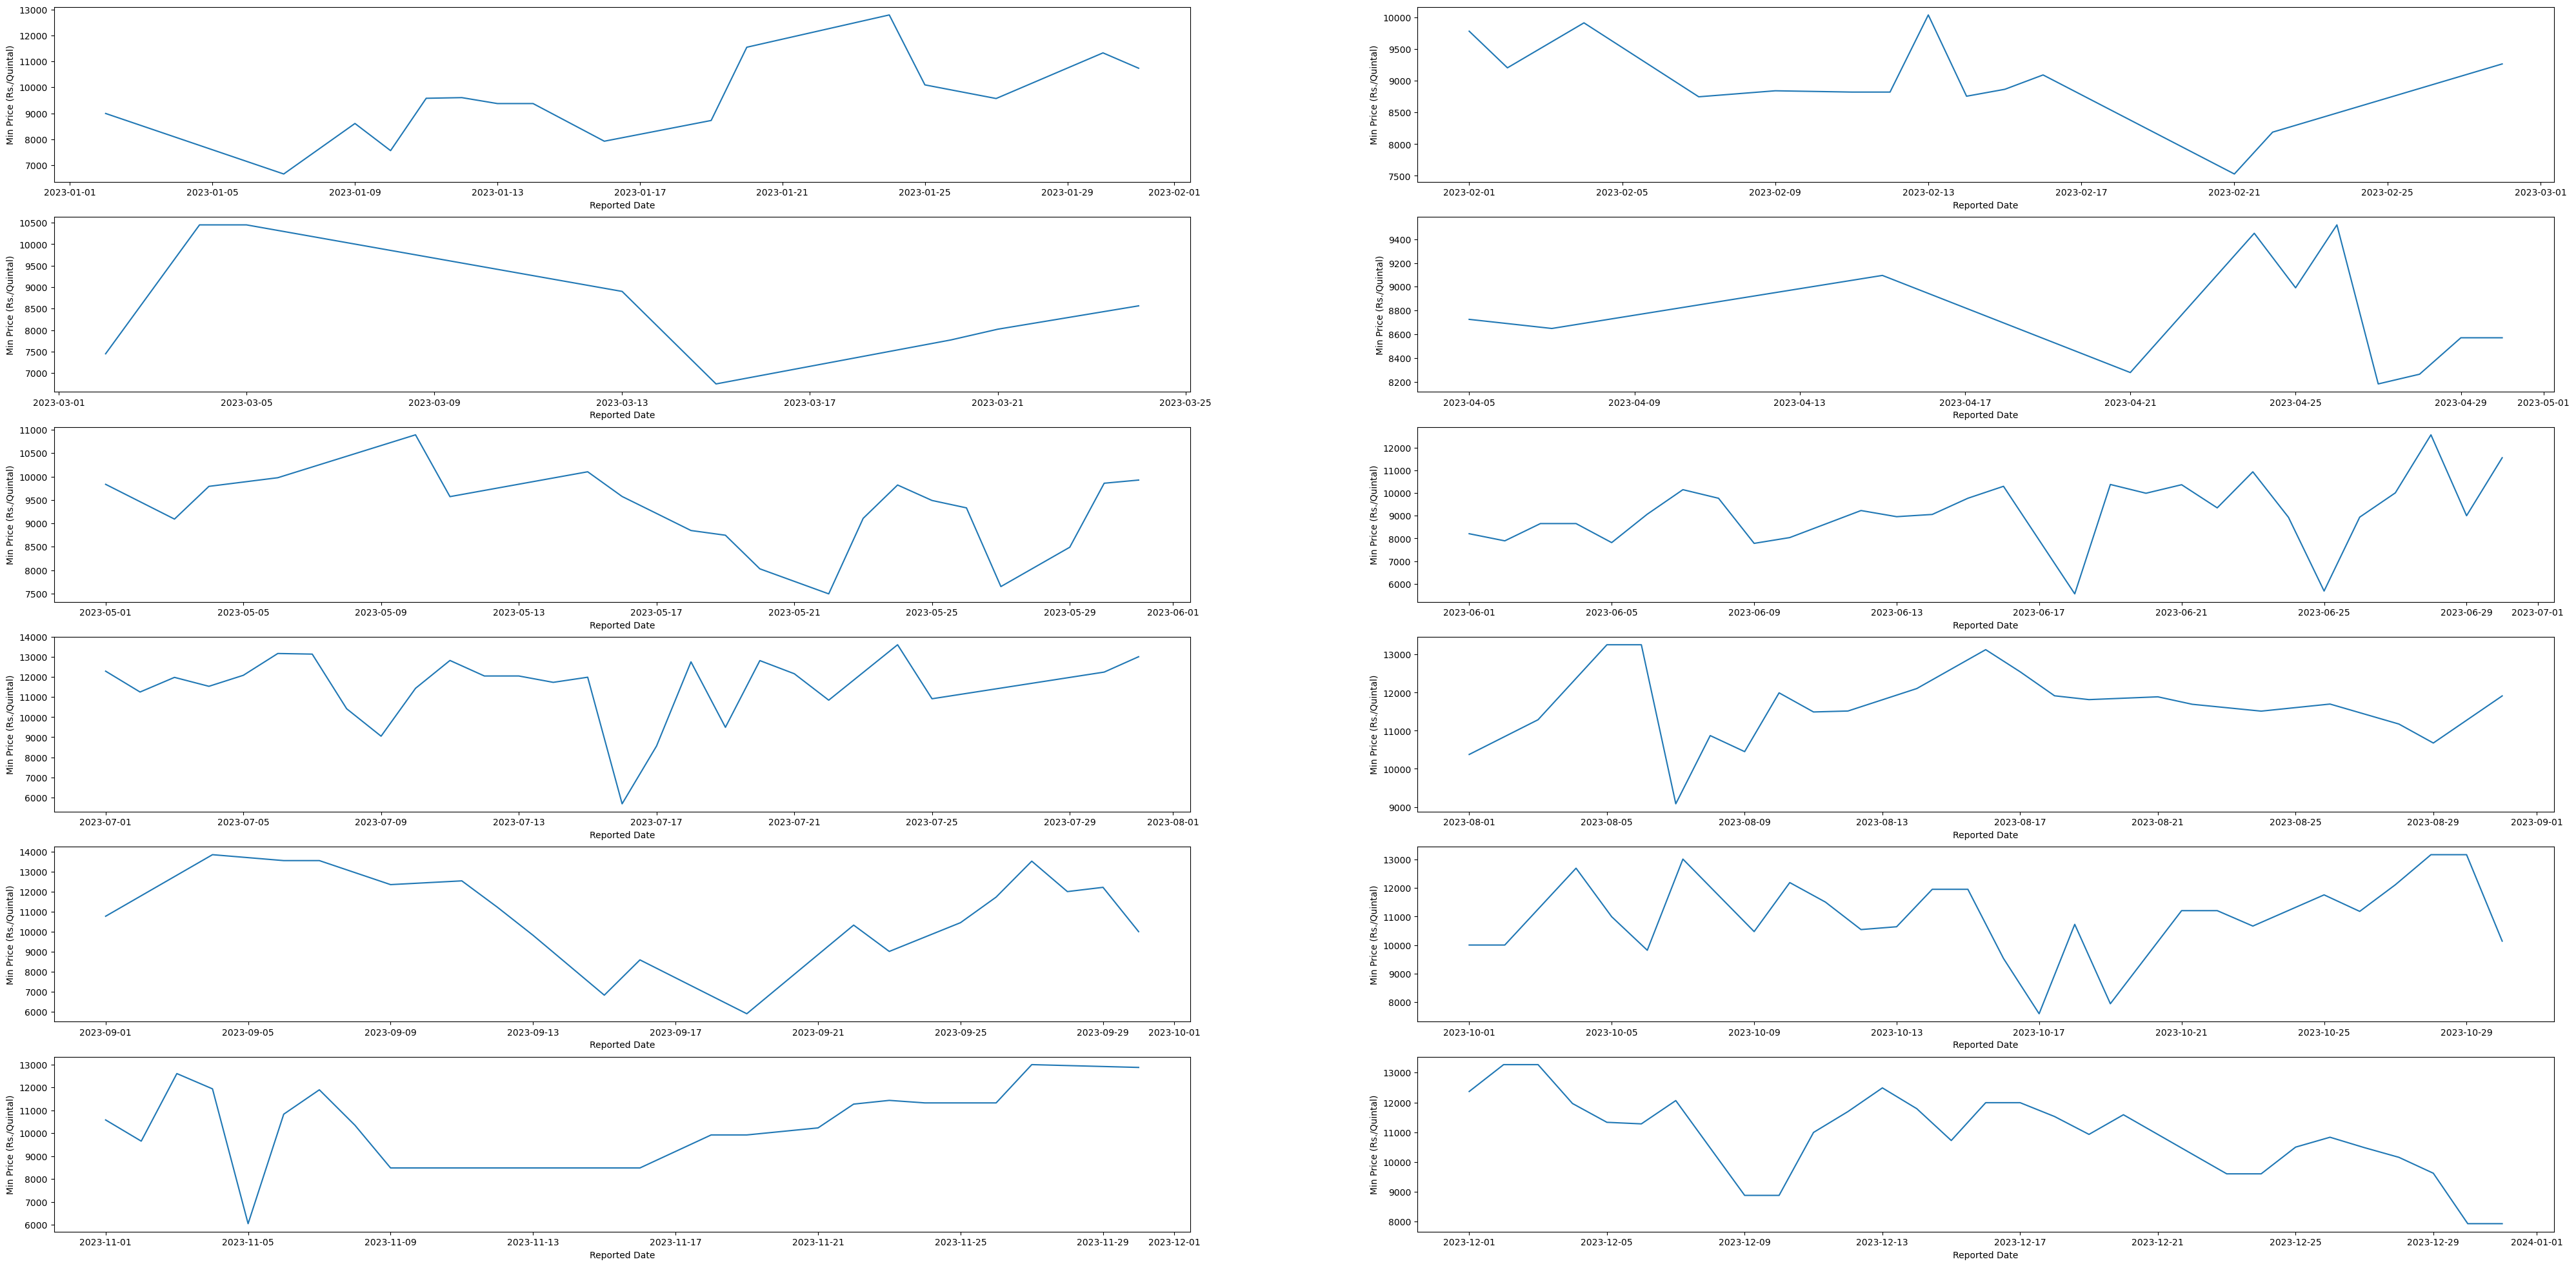

In [131]:
plt.figure(figsize=[50,50])
for i in range(1, 13):
    plt.subplot(12, 2, i)
    start = pd.to_datetime(f"2023-{i:02d}-01")
    end   = start + pd.offsets.MonthEnd(0)
    mask = (arrivals_low.index >= start) & (arrivals_low.index <= end)    
    sns.lineplot(
        x=arrivals_low.index[mask],
        y=arrivals_low.loc[mask, 'Min Price (Rs./Quintal)']
    )

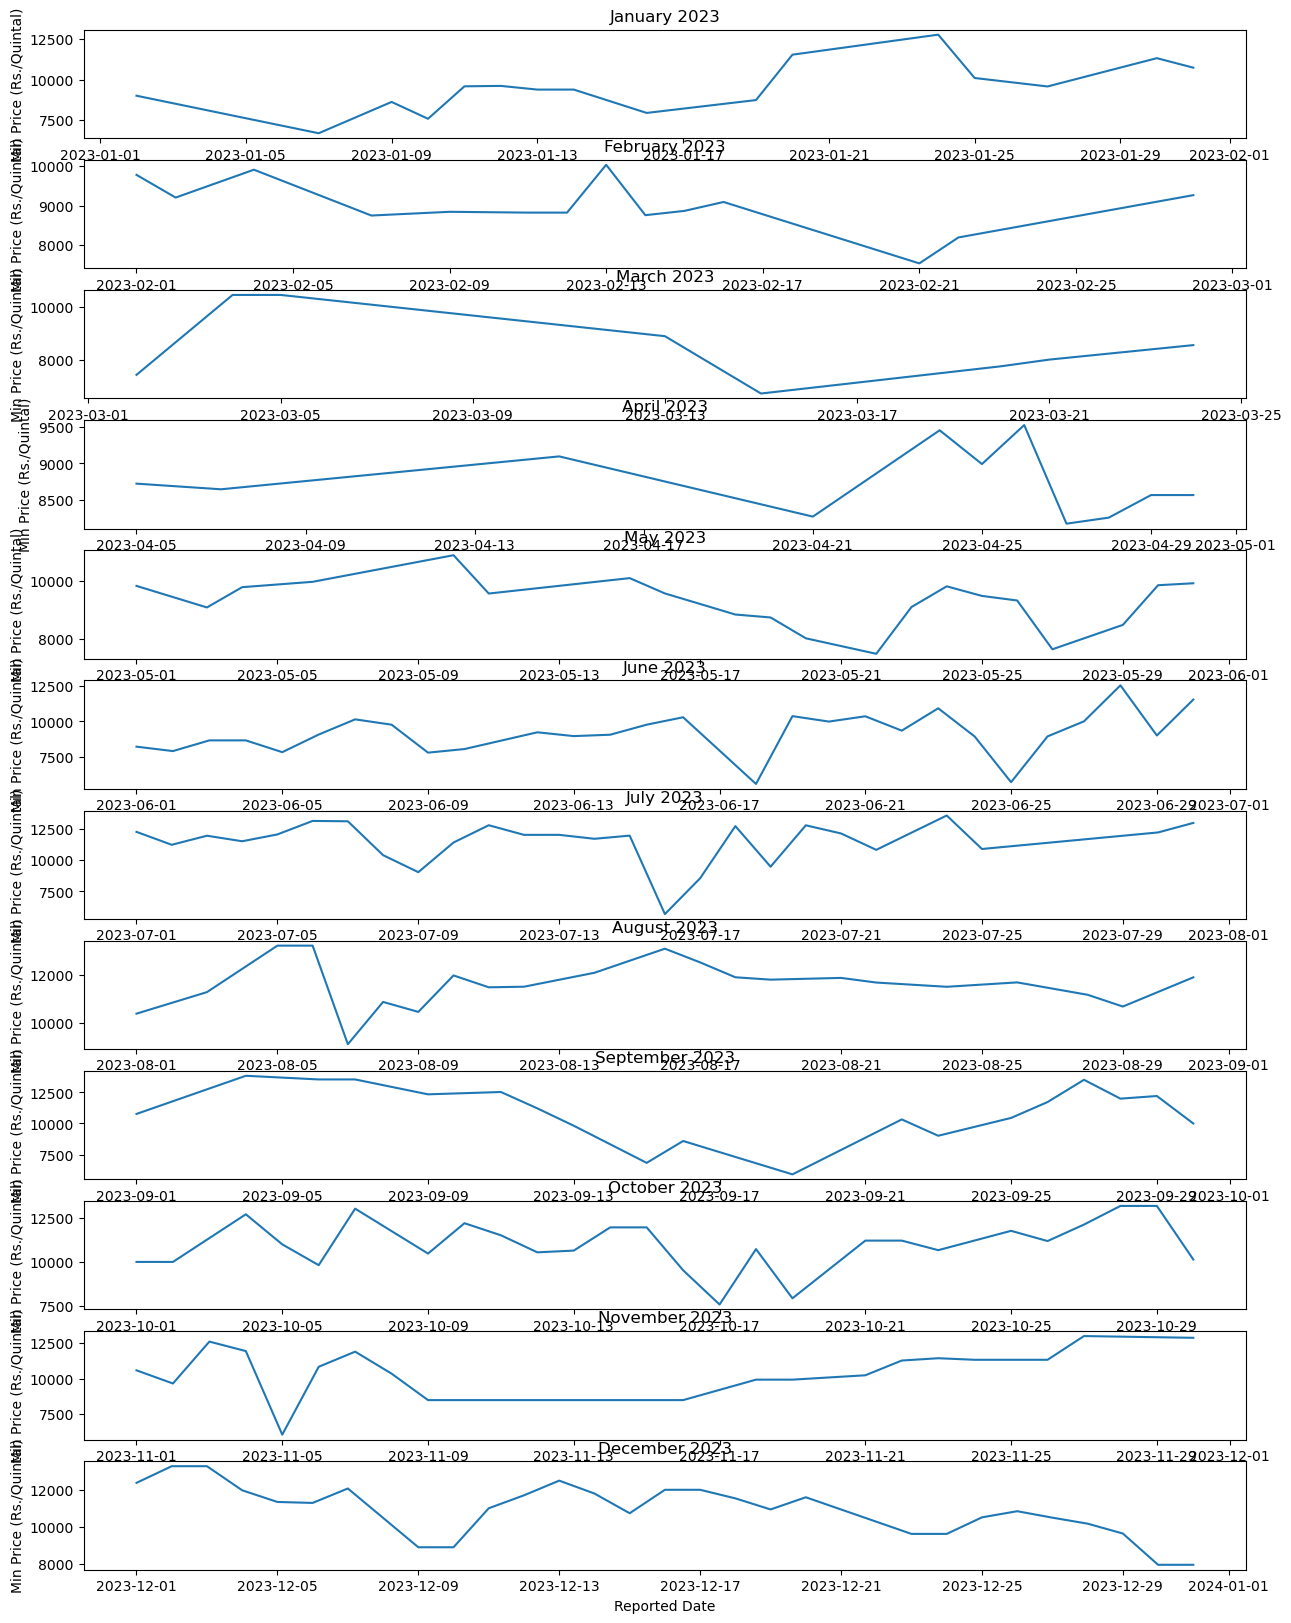

In [132]:
plt.figure(figsize=(15, 20))

months = arrivals_low.index.month.unique()   # which months are present
for i, m in enumerate(sorted(months), 1):
    start = pd.to_datetime(f"2023-{m:02d}-01")
    end   = start + pd.offsets.MonthEnd(0)
    mask = (arrivals_low.index >= start) & (arrivals_low.index <= end)

    plt.subplot(len(months), 1, i)
    sns.lineplot(
        x=arrivals_low.index[mask],
        y=arrivals_low.loc[mask, 'Min Price (Rs./Quintal)']
    )
    plt.title(start.strftime("%B %Y"))

In [133]:
df_Chattisgarh=df[(df['State Name']=='Chattisgarh') & (df['Variety']=='Ajwan')]

In [134]:
df_Chattisgarh

Empty DataFrame
Columns: [State Name, District Name, Market Name, Variety, Group, Arrivals (Tonnes), Min Price (Rs./Quintal), Max Price (Rs./Quintal), Modal Price (Rs./Quintal)]
Index: []

In Chattisgarh there is no ajma related data in this dataset

In [136]:
df[(df['State Name']=='Rajasthan') & df['Variety']=='Ajwan']

Empty DataFrame
Columns: [State Name, District Name, Market Name, Variety, Group, Arrivals (Tonnes), Min Price (Rs./Quintal), Max Price (Rs./Quintal), Modal Price (Rs./Quintal)]
Index: []

In Rajasthan there is no related production

In [138]:
df[(df['State Name']=='Telangana') & (df['Variety']=='Ajwan')]

State Name District Name Market Name Variety   Group  \
Reported Date                                                        
2022-08-11     Telangana   Ranga Reddy   Vikarabad   Ajwan  Spices   

               Arrivals (Tonnes)  Min Price (Rs./Quintal)  \
Reported Date                                               
2022-08-11                  24.5                   7500.0   

               Max Price (Rs./Quintal)  Modal Price (Rs./Quintal)  
Reported Date                                                      
2022-08-11                     13810.0                    10484.0

In this dataset in telangan only vikarabad market got 24.5 arrivals with min price is 7500.0 and with max price is 13810.0,and with modal orice 10484